# Alpha Group - Hotel Booking Demand


**Created By :**
1. Hilfi Biyan Firza (JCDSOL-018-039)
2. Andhik Surya Saputra (JCDSOL-018-028)
3. Fauzan Akmal Baihaqi (JCDSOL-018-038)

---

## Business Problem Understanding

### **Context:**  
Industri perhotelan menghadapi tantangan serius dalam mengelola tingkat okupansi dan memaksimalkan pendapatan, terutama akibat tingkat pembatalan pemesanan yang tinggi, yang berdasarkan penelitian dari [D-Edge Hospitality Solution](https://www.hotelmanagement.net/tech/study-cancelation-rate-at-40-as-otas-push-free-change-policy) rata-rata tingkat pembatalan kamar hotel tahun 2014 adalah 32.9 persen dan menanjak hingga 39.6 persen tahun 2018. Pada dataset yang digunakan, tingkat pembatalan mencpaai 27,5%. Tingginya tingkat pembatalan tersebut salah satunya diakibatkan oleh tindakan tamu yang membatalkan pemesanan mendekati tanggal kedatangan, bahkan pada hari H, menyebabkan kamar kosong yang tidak sempat dijual kembali, sehingga hotel berisiko kehilangan potensi pendapatan, terutama pada periode puncak seperti musim liburan.

Sebagai upaya mitigasi, banyak hotel menerapkan strategi overbooking. Namun, pendekatan ini membawa risiko tersendiri, seperti ketidakpuasan pelanggan ketika kamar tidak tersedia saat kedatangan, yang dapat merusak reputasi dan loyalitas pelanggan.

Selain itu, hotel menghadapi kesulitan dalam mengidentifikasi faktor utama yang memengaruhi pembatalan, karena belum adanya pemodelan prediktif yang memadai. Hal ini menyulitkan dalam merancang strategi harga (pricing), kebijakan pembatalan yang tepat, serta mekanisme insentif.

Lebih lanjut, kurangnya personalisasi dalam penawaran insentif kepada calon tamu—misalnya berdasarkan segmentasi pasar seperti tamu bisnis vs tamu liburan—juga mengurangi tingkat konversi dari pemesanan menjadi kedatangan.

### **Problem Statement :**  
Hotel menghadapi tantangan dalam meningkatkan efisiensi pengelolaan pemesanan di tengah tingginya tingkat pembatalan. Untuk mengatasi hal ini, hotel ingin mengembangkan *strategi dynamic pricing* dan kebijakan pembatalan yang berbasis segmentasi pelanggan, guna meminimalkan risiko pembatalan dan memaksimalkan pendapatan. Tantangannya adalah mengidentifikasi pola pembatalan berdasarkan karakteristik pemesanan (seperti `lead time`, `market segment`, atau `deposit type`) dan profil tamu (seperti `is_repeated_guest` atau `previous_cancellations`), serta merancang strategi responsif untuk setiap segmen pasar tanpa meningkatkan risiko ketidakpuasan pelanggan atau kerugian finansial.

**Target:**  : `is_canceled`

- 0: Pemesanan tidak dibatalkan (Check-Out).  
- 1: Pemesanan dibatalkan (Canceled atau No-Show).

### **Stakeholder**
1. Manajemen Hotel (General Manager, Revenue Manager)
    - Kepentingan: Meningkatkan pendapatan, okupansi, dan efisiensi operasional.
    - Manfaat: Mengambil keputusan berbasis data untuk pricing, overbooking, dan alokasi kamar.
2. Tim Revenue Management / Pricing Analyst
    - Kepentingan: Menetapkan harga yang optimal berdasarkan prediksi pembatalan.
    - Manfaat: Mendapatkan insight untuk membuat strategi dynamic pricing yang lebih akurat.
3. Tim Reservasi dan Front Office
    - Kepentingan: Mengelola overbooking dan menghadapi tamu saat ada pembatalan mendadak.
    - Manfaat: Bisa mengantisipasi potensi masalah dan mempersiapkan alokasi kamar secara efisien.
4. Tim Marketing dan CRM (Customer Relationship Management)
    - Kepentingan: Meningkatkan tingkat konversi dan loyalitas pelanggan.
    - Manfaat: Dapat merancang penawaran dan insentif yang dipersonalisasi untuk tamu dengan risiko tinggi.
5. Tim Keuangan
    - Kepentingan: Mengurangi fluktuasi pendapatan akibat pembatalan.
    - Manfaat: Prediksi lebih akurat terhadap potensi kerugian atau pengembalian dana.

### **Goals :**  
1. Membangun model prediktif untuk memprediksi probabilitas pembatalan pemesanan dengan akurasi tinggi berdasarkan data seperti `lead time`, `market segment`, `adr` (Average Daily Rate), dan `total_of_special_requests`, sehingga hotel dapat mengelola kapasitas kamar secara lebih efisien.
2. Mengidentifikasi faktor utama yang memengaruhi pembatalan (misalnya, segmen pasar dengan tingkat pembatalan tinggi seperti `Online TA` atau `lead time` yang panjang) untuk merancang strategi dynamic pricing yang optimal.
3. Mengoptimalkan strategi overbooking berdasarkan probabilitas pembatalan untuk meningkatkan tingkat okupansi dan pendapatan tanpa meningkatkan risiko relokasi tamu yang dapat merusak reputasi hotel.

### **Analytic Approach :**  
Kita akan menganalisis data untuk mengidentifikasi pola yang membedakan pemesanan yang dibatalkan dan tidak dibatalkan, menggunakan fitur seperti `lead time`, `market_segment`, `deposit_type`, `is_repeated_guest`, dan `adr`.


### **Metric Evaluation**

| **ACTUAL** | **PREDICTED** |  |
|------------|---------------|--|
|            | **Not Canceled (0)** | **Canceled (1)** |
| **Not Canceled (0)** | **TRUE NEGATIVE (TN)**<br>Model memprediksi pemesanan tidak dibatalkan dan memang tidak dibatalkan. | **FALSE POSITIVE (FP)**<br>Model memprediksi pemesanan dibatalkan, padahal tidak dibatalkan. |
| **Canceled (1)** | **FALSE NEGATIVE (FN)**<br>Model memprediksi pemesanan tidak dibatalkan, padahal dibatalkan. | **TRUE POSITIVE (TP)**<br>Model memprediksi pemesanan dibatalkan dan memang dibatalkan. |

Penjelasan dan Dampak Bisnis:

1. True Negative (TN):  
- Definisi: Model memprediksi pemesanan tidak dibatalkan, dan memang tidak dibatalkan (Check-Out).
- Dampak Bisnis: Hasil ini mendukung perencanaan okupansi yang akurat tanpa perlu intervensi tambahan, meningkatkan efisiensi operasional dan kepuasan pelanggan.
2. False Positive (FP):  
- Definisi: Model memprediksi pemesanan dibatalkan, padahal tidak dibatalkan.
- Dampak Bisnis: Hotel mungkin melakukan overbooking berlebihan, yang dapat menyebabkan tamu harus direlokasi ke hotel lain. Hal ini meningkatkan biaya operasional (misalnya, biaya transportasi atau kompensasi) dan berpotensi merusak reputasi serta kepuasan pelanggan.
3. False Negative (FN):  
- Definisi: Model memprediksi pemesanan tidak dibatalkan, padahal dibatalkan (Canceled atau No-Show).
- Dampak Bisnis: Hotel kehilangan peluang untuk menjual kamar kepada tamu lain, sehingga kamar tetap kosong dan pendapatan (`adr`) hilang. Ini adalah kerugian finansial signifikan, terutama pada periode puncak.
4. True Positive (TP):  
- Definisi: Model memprediksi pemesanan dibatalkan, dan memang dibatalkan.
- Dampak Bisnis: Hasil ini memungkinkan hotel untuk mengoptimalkan overbooking atau menawarkan kamar kepada tamu lain, sehingga memaksimalkan tingkat okupansi dan pendapatan.

#### **Pemilihan Metrik Evaluasi:**  

Mengingat terdapat ketidakseimbangan kelas dalam data (mayoritas pemesanan tidak dibatalkan) dan adanya konsekuensi bisnis signifikan dari kesalahan prediksi, maka metrik evaluasi yang digunakan disesuaikan dengan dua risiko utama:
- False Positives (FP) → Overbooking yang berujung pada biaya relokasi dan ketidakpuasan pelanggan.
- False Negatives (FN) → Pembatalan tidak terdeteksi, sehingga kamar tidak terjual kembali dan terjadi kehilangan pendapatan (adr).

Metrik yang dipilih:

1. **F1-Score**

Menggabungkan Precision dan Recall, sehingga seimbang dalam menangani FP dan FN.
- Precision → Mengurangi FP untuk mencegah overbooking berlebihan.
- Recall → Meningkatkan deteksi pembatalan (mengurangi FN).

2. **Precision-Recall AUC**

Lebih sesuai untuk dataset yang tidak seimbang, karena fokus pada performa model dalam memprediksi kelas positif (pembatalan).


### **Business Impact**

1. **Peningkatan Pendapatan**:

    Dengan menerapkan strategi dynamic pricing berbasis probabilitas pembatalan, hotel dapat menetapkan harga lebih tinggi pada segmen dengan risiko pembatalan tinggi (misalnya Online Travel Agencies) dan memberikan diskon strategis untuk segmen dengan loyalitas tinggi (misalnya Direct Booking), sehingga meningkatkan total revenue secara keseluruhan.
   
2. **Pengurangan Kerugian Akibat Kamar Kosong**:

   Implementasi kebijakan pembatalan berbasis segmentasi—seperti penerapan deposit non-refundable untuk segmen berisiko tinggi—membantu hotel mengurangi potensi kerugian akibat pembatalan mendadak dan kamar yang tidak terisi kembali.


3. **Optimalisasi Tingkat Okupansi**:


     Model prediktif yang akurat memungkinkan hotel menerapkan strategi overbooking secara cerdas, yaitu hanya pada kondisi yang terukur, untuk meminimalkan jumlah kamar kosong tanpa meningkatkan risiko relokasi atau komplain pelanggan.
4. **Peningkatan Kepuasan dan Loyalitas Pelanggan**:

   Dengan menggunakan data prediksi risiko pembatalan, hotel dapat memberikan penawaran insentif yang dipersonalisasi (seperti upgrade kamar atau fasilitas tambahan) kepada tamu yang berisiko membatalkan, sehingga meningkatkan konversi pemesanan menjadi kedatangan, serta memperkuat loyalitas pelanggan.

---

## Data Understanding

Dataset source : [Kaggle](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)

Data yang digunakan diambil dari periode bulan Juli 2015 - Agustus 2017
Data diambil dari data hotel di Portugal. Data Resort Hotel dari daerah Algrave sedangkan data City Hotel dari daerah Lisbon. 

### Informasi Atribut

| **Atribut** | **Tipe Data** | **Deskripsi** |
|-------------|---------------|---------------|
| `hotel` | object | Jenis hotel (Resort Hotel atau City Hotel) |
| `is_canceled` | int64 | Status pembatalan (0: Tidak dibatalkan, 1: Dibatalkan) |
| `lead_time` | int64 | Jumlah hari antara pemesanan dan tanggal kedatangan |
| `arrival_date_year` | int64 | Tahun kedatangan |
| `arrival_date_month` | object | Bulan kedatangan |
| `arrival_date_week_number` | int64 | Nomor minggu kedatangan dalam setahun |
| `arrival_date_day_of_month` | int64 | Tanggal kedatangan dalam sebulan |
| `stays_in_weekend_nights` | int64 | Jumlah malam menginap di akhir pekan |
| `stays_in_week_nights` | int64 | Jumlah malam menginap di hari kerja |
| `adults` | int64 | Jumlah tamu dewasa |
| `children` | float64 | Jumlah anak-anak |
| `babies` | int64 | Jumlah bayi |
| `meal` | object | Jenis paket makanan (BB: Bed & Breakfast, HB: Half Board, FB: Full Board, SC: Self Catering) |
| `country` | object | Negara asal tamu |
| `market_segment` | object | Segmen pasar (misalnya, Online TA, Offline TA/TO, Groups, Direct) |
| `distribution_channel` | object | Saluran distribusi (misalnya, TA/TO, Direct, Corporate) |
| `is_repeated_guest` | int64 | Status tamu berulang (0: Bukan, 1: Ya) |
| `previous_cancellations` | int64 | Jumlah pembatalan sebelumnya oleh tamu |
| `previous_bookings_not_canceled` | int64 | Jumlah pemesanan sukses sebelumnya oleh tamu |
| `reserved_room_type` | object | Tipe kamar yang dipesan |
| `assigned_room_type` | pbject | Tipe kamar yang diberikan |
| `booking_changes` | int64 | Jumlah perubahan pada pemesanan |
| `deposit_type` | object | Jenis deposit (No Deposit, Non Refund, Refundable) |
| `agent` | float64 | ID agen yang menangani pemesanan (bisa NULL) |
| `company` | float64 | ID perusahaan yang terkait dengan pemesanan (bisa NULL) |
| `days_in_waiting_list` | int64 | Jumlah hari pemesanan dalam daftar tunggu |
| `customer_type` | object | Tipe pelanggan (Transient, Contract, Group, Transient-Party) |
| `adr` | float64 | Tarif rata-rata harian (Average Daily Rate) |
| `required_car_parking_spaces` | int64 | Jumlah tempat parkir yang diminta |
| `total_of_special_requests` | int64 | Jumlah permintaan khusus (misalnya, extra bed, late check-in) |
| `reservation_status` | object | Status reservasi (Check-Out, Canceled, No-Show) |
| `reservation_status_date` | object | Tanggal status reservasi diperbarui |

---

In [1]:
# Library
import pandas as pd
import numpy as np
import xgboost as xgb
import joblib

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import missingno as msno
from IPython.display import display


# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
#Load Dataset
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

---

## Data Cleaning

**Tujuan Data Cleaning:**

- Memastikan dataset bersih dari missing values, outliers, dan inkonsistensi yang dapat mengganggu analisis atau performa model prediktif.
- Mempersiapkan fitur-fitur penting seperti `lead_time`, `market_segment`, `adr`, dan `is_canceled` untuk analisis pola pembatalan dan strategi bisnis.
- Menangani ketidakseimbangan data dan fitur kategorikal dengan kardinalitas tinggi (misalnya, country) untuk mendukung pemodelan yang akurat.

In [4]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[1, 0]"
2,lead_time,int64,0,0.00,479,"[253, 429]"
3,arrival_date_year,int64,0,0.00,3,"[2016, 2015]"
4,arrival_date_month,object,0,0.00,12,"[October, May]"
5,arrival_date_week_number,int64,0,0.00,53,"[49, 25]"
6,arrival_date_day_of_month,int64,0,0.00,31,"[26, 4]"
7,stays_in_weekend_nights,int64,0,0.00,17,"[5, 4]"
8,stays_in_week_nights,int64,0,0.00,35,"[17, 50]"
9,adults,int64,0,0.00,14,"[2, 55]"


Dari data tersebut kita bisa perhatikan pada kolom country terdapat 488 data yang null dan kolom agent terdapat 16.340 data yang null atau sebesar 13.69 persen. Data kosong atau null terbesar ada pada kolom company dengan persentase kosong 94.31 % atau sekitar 112.593 data yang kosong. Untuk tipe data pada bagian kolom children tipe data floating akan diganti dengan tipe data integer karena alasan logika dasar satuan anak tidak mungkin floating. untuk tipe data reservation_status_date berupa objek seharusnya berupa datetime.

Berikutnya, sekarang mari kita visualisasikan missing values/data yang hilang pada dataframe kita dengan menggunakan library missingno

reference : 
- [Using the missingno Python library to Identify and Visualise Missing Data Prior to Machine Learning](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009)
- [Github](https://github.com/ResidentMario/missingno)



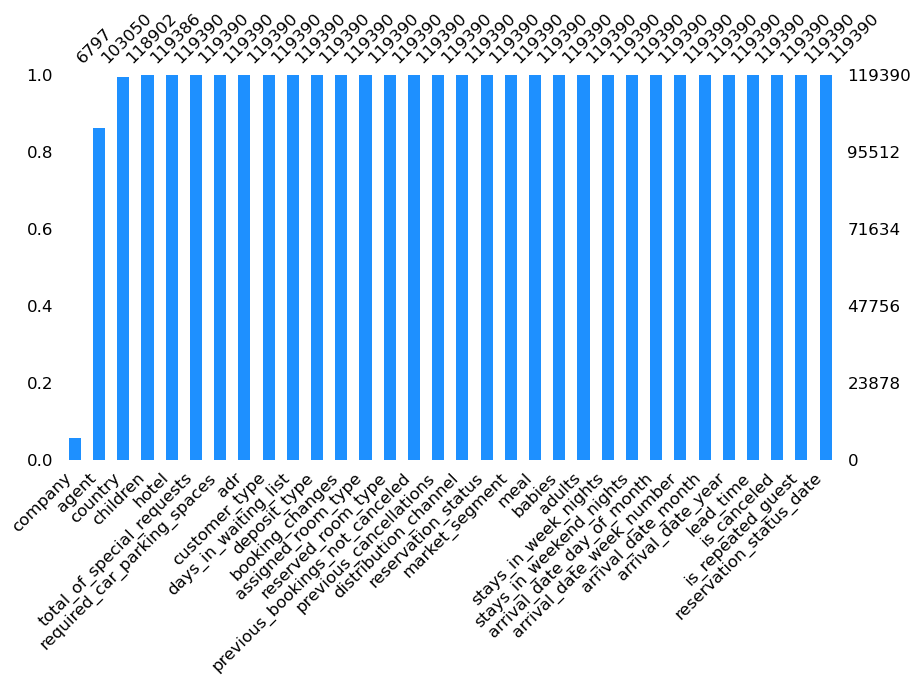

In [5]:
# Visualisasi missing values menggunakan missingno (Bar Plot)
msno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Terlihat dari Bar Plot diatas, kolom company, agent, country dan children memiliki missing value atau data yang hilang. seperti yang sudah terlihat dari rangkuman data disebelumnya.

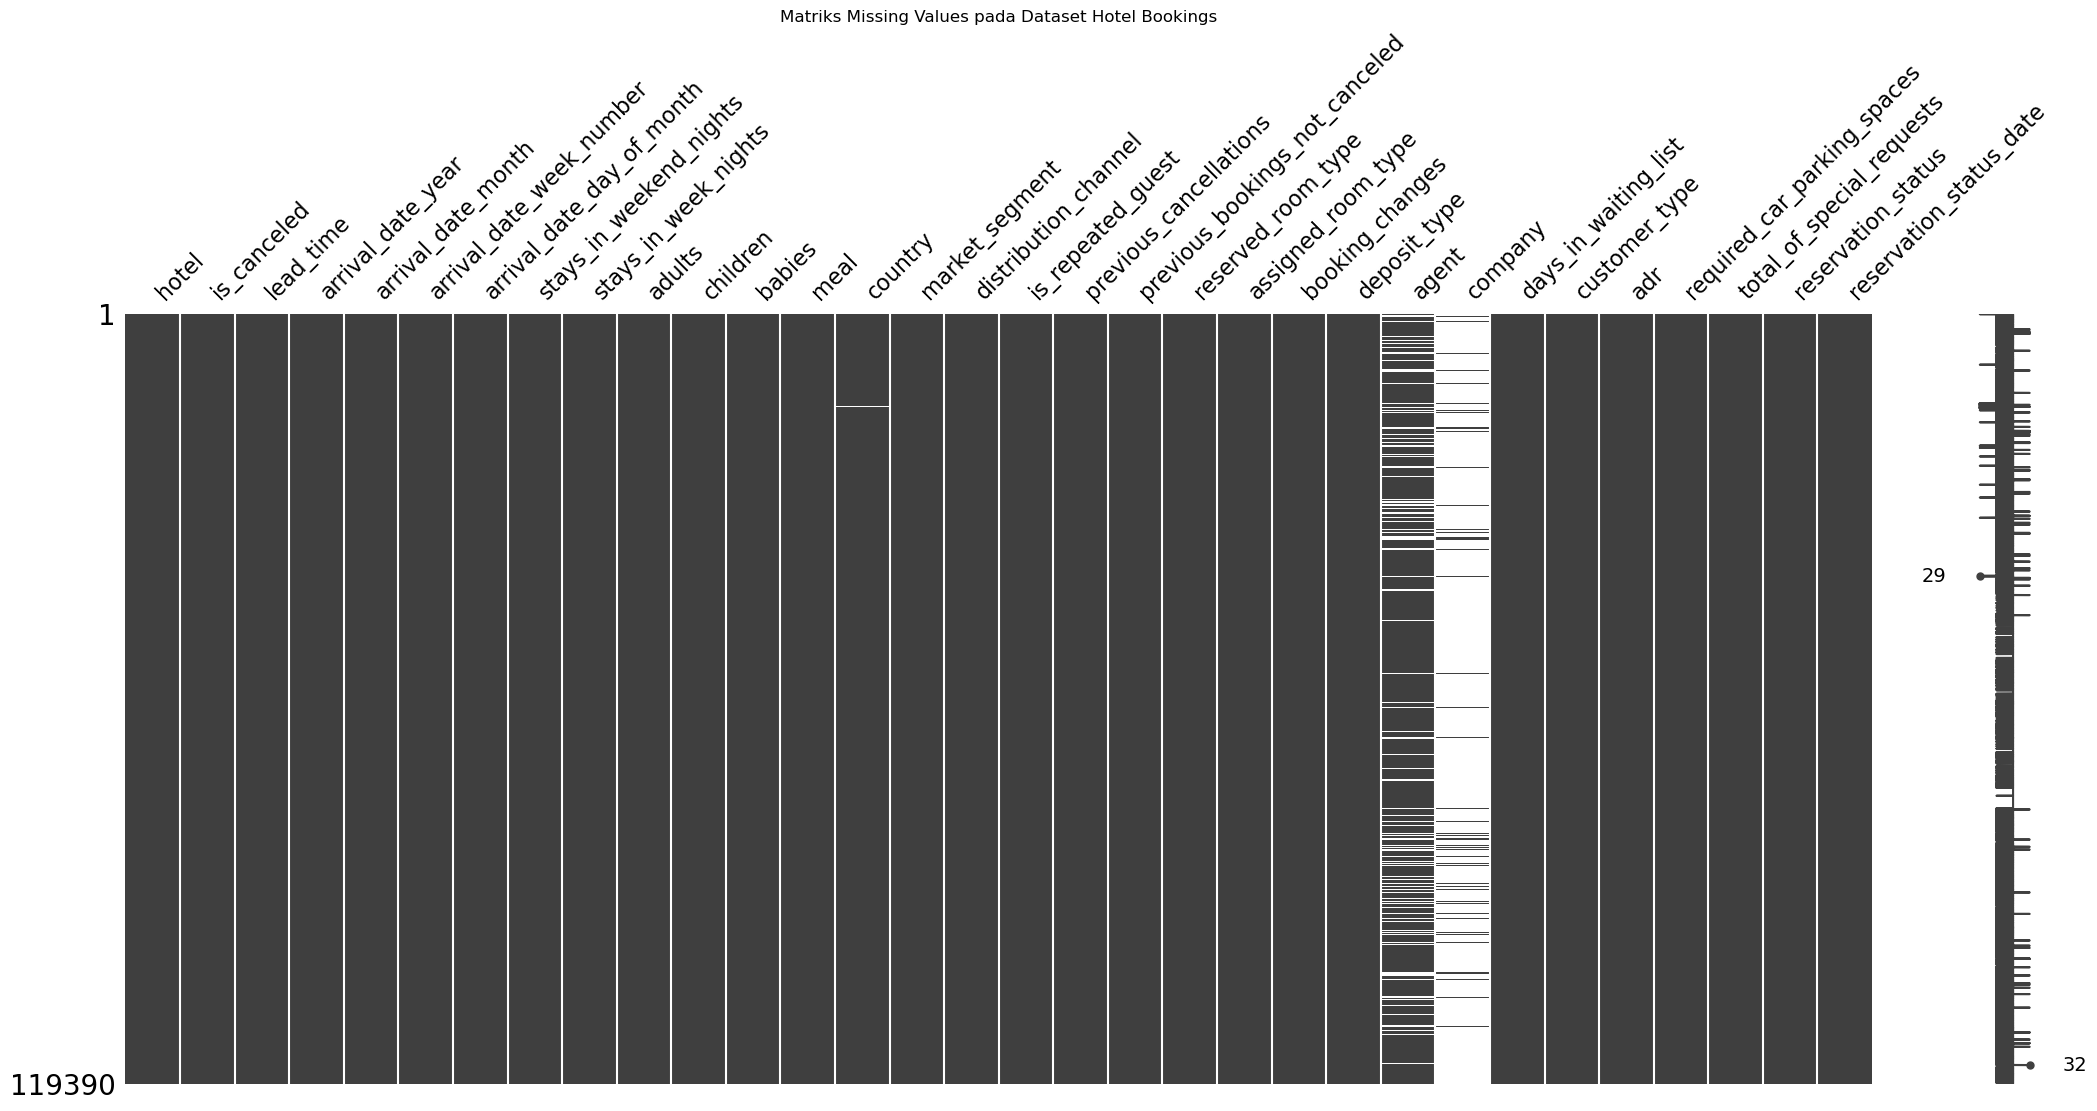

In [6]:
# Visualisasi missing values menggunakan missingno
msno.matrix(df)
plt.title("Matriks Missing Values pada Dataset Hotel Bookings")
plt.show()

In [7]:
listItem = []
selected_columns = ['company', 'agent', 'country', 'children']

for col in selected_columns :
    persentase = round((df[col].isna().sum()/len(df[col])) * 100,3);
    total_na = df[col].isna().sum();
    listItem.append([col, persentase, total_na])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'Persentase', 'Jumlah NA'], data=listItem)
dfDesc

,dataFeatures,Persentase,Jumlah NA
0,company,94.307,112593
1,agent,13.686,16340
2,country,0.409,488
3,children,0.003,4


Berdasarkan visualisasi matriks di atas, maka:
1. Kolom `company` dan `agent`:
- Nilai hilang yang dominan pada kolom ini (company 94.3% dan agent 13.68%) menunjukkan bahwa sebagian besar pemesanan berasal dari individu atau kanal non-korporat. Untuk analisis, kolom `company` mungkin dapat dihapus karena rendahnya relevansi, sementara `agent` dapat diisi dengan nilai default (misalnya, 0) untuk menunjukkan pemesanan langsung.
- Kita bisa fokus pada kanal distribusi utama seperti `Online TA` atau `Direct` untuk strategi pemasaran, karena pemesanan korporat tampaknya jarang.
2. Kolom `country`:
- Nilai hilang pada `country` dapat memengaruhi analisis demografis, seperti menentukan pasar utama hotel. Mengisi nilai hilang dengan 'Unknown' memungkinkan analisis tetap dilakukan tanpa kehilangan data.
- Kita bisa menggunakan data `country` untuk segmentasi pasar dan menargetkan promosi ke negara dengan volume pemesanan tinggi, sambil mempertimbangkan 'Unknown' sebagai kategori terpisah.
3. Kolom `children`:
- Nilai hilang yang sedikit pada `children` menunjukkan bahwa sebagian besar entri memiliki data lengkap. Mengisi dengan 0 adalah asumsi logis (tidak ada anak).
- Informasi ini penting untuk merancang paket keluarga atau fasilitas ramah anak, terutama untuk pemesanan dengan nilai `children` > 0.

#### 1. Penanganan nilai hilang (missing values)

In [8]:
# Penanganan missing values:
# Kolom 'children': Mengisi dengan 0 (asumsi tidak ada anak jika data hilang)
df['children'] = df['children'].fillna(0)

Kolom `children`: Nilai hilang diisi dengan 0, mengasumsikan tidak ada anak jika data tidak tersedia, karena ini adalah asumsi logis dalam konteks pemesanan hotel.

In [9]:
# Kolom 'country': Mengisi dengan 'Unknown' untuk menjaga integritas data
df['country'] = df['country'].fillna('Unknown')

Kolom `country`: Diisi dengan 'Unknown' untuk menjaga informasi tanpa menghapus baris, yang penting untuk analisis demografis.

In [10]:
# Kolom 'agent': Mengisi dengan 0 (menunjukkan tidak ada agen)
df['agent'] = df['agent'].fillna(0)

In [11]:
# Kolom 'company': Mengisi dengan 0 (menunjukkan tidak ada perusahaan)
df['company'] = df['company'].fillna(0)

Kolom agent dan company: Diisi dengan 0 untuk menunjukkan tidak ada agen atau perusahaan terkait, sesuai dengan praktik umum dalam industri perhotelan.

**Note:**
- Menjaga baris dengan nilai hilang daripada menghapusnya memastikan dataset tetap besar untuk analisis, yang kritis untuk model prediktif seperti memprediksi pembatalan.

#### 2. Mengubah tipe data

In [12]:
# Mengubah 'children', 'babies', 'agent', 'company' menjadi integer
df[['children', 'babies', 'agent', 'company']] = df[['children', 'babies', 'agent', 'company']].astype(int)

Kolom seperti `children`, `babies`, `agent`, dan `company` diubah menjadi integer karena mereka mewakili data diskrit (jumlah orang atau ID).

In [13]:
# Mengubah 'reservation_status_date' menjadi format datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

Kolom `reservation_status_date` diubah menjadi format datetime untuk memudahkan analisis berbasis waktu, seperti tren musiman atau perhitungan jarak waktu.

**Note:**
- Tipe data yang benar memastikan kompatibilitas dengan algoritma machine learning dan analisis waktu yang akurat, yang penting untuk perencanaan kapasitas hotel.

#### 3. Penanganan duplikasi

In [14]:
# Mengecek dan menghapus baris duplikat
print(f"Jumlah baris duplikat sebelum dihapus: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris duplikat sebelum dihapus: 31994
Jumlah baris setelah menghapus duplikat: 87396


Baris duplikat dihapus untuk menghindari bias dalam analisis, seperti overestimation pada tingkat pembatalan atau pendapatan. Dataset ini memiliki banyak duplikat (contohnya pada pemesanan grup), yang dapat mengganggu akurasi model prediktif.

**Note:**
- Menghapus duplikat memastikan laporan keuangan atau prediksi okupansi lebih akurat.

#### 4. Penanganan Outlier
Mendeteksi outlier pada kolom numerik seperti `adr` (average daily rate)

Kita menggunakan metode IQR atau Interquartile Range adalah metode statistik yang digunakan untuk mengidentifikasi outlier atau data pencilan, yaitu nilai-nilai yang secara signifikan berbeda dari mayoritas data dalam sebuah distribusi. Metode ini didasarkan pada analisis kuartil, yaitu pembagian data menjadi empat bagian yang sama besar.

In [15]:
# Menggunakan metode IQR
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
# Mengganti outlier dengan median
df['adr'] = df['adr'].apply(lambda x: df['adr'].median() if x < lower_bound or x > upper_bound else x)

Kolom `adr` (average daily rate) diperiksa untuk outlier menggunakan metode IQR. Nilai ekstrem diganti dengan median untuk menghindari distorsi dalam analisis harga.

**Note:**
- Outlier pada adr dapat mengacaukan strategi penetapan harga atau analisis profitabilitas, sehingga penggantian dengan median adalah solusi yang praktis.

#### 5. Membuat kolom baru untuk analisis lebih lanjut

Kolom ini mendukung analisis seperti okupansi, kebutuhan fasilitas, atau segmentasi pelanggan, yang krusial untuk strategi pemasaran dan operasional hotel.

In [17]:
# Total malam menginap
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

Kolom `total_stays` dihitung sebagai jumlah malam akhir pekan dan hari kerja untuk memudahkan analisis durasi menginap.

In [18]:
# Total tamu
df['total_guests'] = df['adults'] + df['children'] + df['babies']

Kolom `total_guests` menggabungkan `adults`, `children`, dan `babies` untuk memberikan gambaran total tamu per pemesanan.

#### 6. Penanganan nilai tidak wajar
Data yang tidak realistis dapat mengganggu model prediktif atau laporan operasional, sehingga pembersihan ini penting untuk keandalan.

In [19]:
# Memastikan 'adr' tidak negatif
df.loc[df['adr'] < 0, 'adr'] = df['adr'].median()

Nilai negatif pada `adr` diganti dengan median, karena tarif harian tidak boleh negatif dalam konteks bisnis perhotelan.

In [20]:
# Memastikan 'adults' tidak nol (minimal 1 dewasa per pemesanan)
df = df[df['adults'] > 0]

Baris dengan adults = 0 dihapus, karena pemesanan hotel memerlukan minimal satu tamu dewasa.

#### 7. Menghapus kolom yang tidak relevan untuk analisis

Mengurangi dimensi data meningkatkan efisiensi pemrosesan dan fokus pada variabel yang benar-benar berdampak.

In [21]:
# 'company' sering kali memiliki nilai 0, sehingga dapat dihapus jika tidak diperlukan
df = df.drop(columns=['company'], errors='ignore')

Kolom `company` dihapus karena sebagian besar bernilai 0, yang menunjukkan rendahnya relevansi untuk analisis lebih lanjut.

#### 8. Memeriksa konsistensi data kategorikal

Konsistensi kategorikal penting untuk analisis segmentasi pelanggan atau preferensi layanan.

In [22]:
# Mengganti nilai yang tidak konsisten di kolom 'meal'
df['meal'] = df['meal'].replace({'Undefined': 'SC'})

Nilai 'Undefined' pada kolom meal diganti dengan 'SC' (Self Catering), karena ini konsisten dengan kategori lain dan mencegah ambiguitas.

#### 9. Menyimpan dataset yang telah dibersihkan

In [23]:
# Menyimpan dataset yang telah dibersihkan
df.to_csv("hotel_bookings_cleaned.csv", index=False)
print("Dataset telah dibersihkan dan disimpan sebagai 'hotel_bookings_cleaned.csv'")

Dataset telah dibersihkan dan disimpan sebagai 'hotel_bookings_cleaned.csv'


Dataset disimpan sebagai file baru (hotel_bookings_cleaned.csv) untuk digunakan dalam analisis atau pemodelan selanjutnya.

In [24]:
# Menampilkan ringkasan dataset setelah pembersihan
print("\nRingkasan dataset setelah pembersihan:")
print(df.info())


Ringkasan dataset setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
Index: 87011 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87011 non-null  object        
 1   is_canceled                     87011 non-null  int64         
 2   lead_time                       87011 non-null  int64         
 3   arrival_date_year               87011 non-null  int64         
 4   arrival_date_month              87011 non-null  object        
 5   arrival_date_week_number        87011 non-null  int64         
 6   arrival_date_day_of_month       87011 non-null  int64         
 7   stays_in_weekend_nights         87011 non-null  int64         
 8   stays_in_week_nights            87011 non-null  int64         
 9   adults                          87011 non-null  int64         
 10  children                        87

---

## Exploratory Data Analysis (EDA)

In [25]:
# Memuat dataset yang telah dibersihkan
df = pd.read_csv("hotel_bookings_cleaned.csv")

# Mengatur gaya visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

#### 1. Ringkasan Statistik Dasar

In [26]:
print("Ringkasan Statistik Dasar:")
print(df.describe(include='all'))

Ringkasan Statistik Dasar:
             hotel   is_canceled     lead_time  arrival_date_year  \
count        87011  87011.000000  87011.000000       87011.000000   
unique           2           NaN           NaN                NaN   
top     City Hotel           NaN           NaN                NaN   
freq         53055           NaN           NaN                NaN   
mean           NaN      0.275000     79.862374        2016.210376   
std            NaN      0.446517     86.007705           0.686381   
min            NaN      0.000000      0.000000        2015.000000   
25%            NaN      0.000000     11.000000        2016.000000   
50%            NaN      0.000000     49.000000        2016.000000   
75%            NaN      1.000000    125.000000        2017.000000   
max            NaN      1.000000    737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count               87011              87011.000000   
unique                 12         

Statistik deskriptif memberikan fondasi penting untuk memahami karakteristik pasar dan perilaku pelanggan. Rata-rata adr (Average Daily Rate) mencerminkan harga pasar yang dapat diterima secara umum, sementara standar deviasi yang tinggi menunjukkan adanya segmen pasar yang beragam—mulai dari pelanggan budget hingga premium.

Distribusi kategorikal, seperti dominasi City Hotel, menandakan bahwa lokasi perkotaan lebih diminati, baik untuk tujuan bisnis maupun wisata. Temuan ini dapat memengaruhi arah alokasi anggaran pemasaran, misalnya dengan memperkuat promosi digital untuk City Hotel atau membentuk paket khusus untuk segmen urban traveler.

Selain itu, kolom seperti total_guests dan total_stays memberikan gambaran tentang:
- Ukuran rata-rata grup tamu, yang penting untuk menentukan kapasitas fasilitas seperti restoran atau meeting room.
- Durasi rata-rata menginap, yang dapat digunakan untuk merancang strategi long-stay discount atau penjadwalan layanan housekeeping.

Hotel dapat memanfaatkan data ini untuk:
- Menetapkan baseline pricing yang kompetitif, disesuaikan dengan rata-rata adr historis.
- Menyesuaikan inventaris kamar dan penjadwalan staf berdasarkan pola durasi menginap dan jumlah tamu per reservasi.
- Menargetkan segmen pelanggan spesifik (seperti pasangan, solo traveler, atau grup kecil) dengan penawaran yang relevan berdasarkan distribusi data aktual.

Dengan mengintegrasikan analisis statistik deskriptif ini ke dalam perencanaan operasional dan strategi pemasaran, hotel dapat mengoptimalkan pendapatan sekaligus meningkatkan efisiensi layanan.

#### 2. Distribusi Pembatalan (`is_canceled`)

In [27]:
print("\nDistribusi Pembatalan:")
print(df['is_canceled'].value_counts(normalize=True) * 100)


Distribusi Pembatalan:
is_canceled
0    72.500029
1    27.499971
Name: proportion, dtype: float64


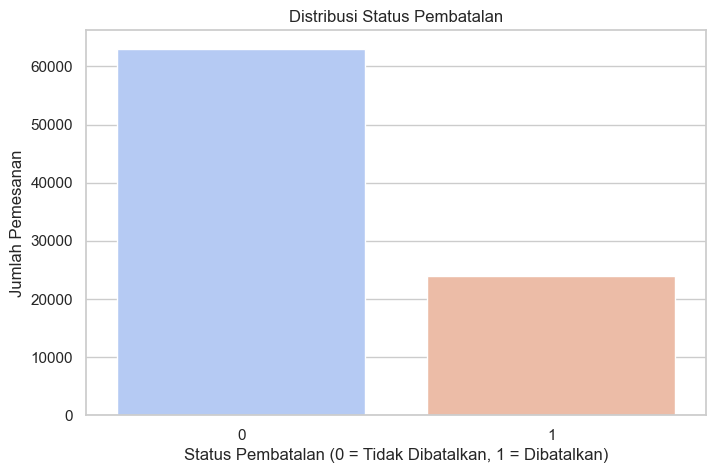

In [28]:
# Visualisasi distribusi pembatalan
plt.figure(figsize=(8, 5))
sns.countplot(x='is_canceled', data=df, palette='coolwarm')
plt.title('Distribusi Status Pembatalan')
plt.xlabel('Status Pembatalan (0 = Tidak Dibatalkan, 1 = Dibatalkan)')
plt.ylabel('Jumlah Pemesanan')
plt.show()

Visualisasi menunjukkan bahwa proporsi pembatalan pemesanan cukup tinggi, yakni lebih dari 30%. Angka ini mengindikasikan potensi kerugian pendapatan yang signifikan, karena kamar yang dibatalkan—terutama pada pemesanan mendekati tanggal menginap—mungkin tidak dapat segera diisi kembali.

Tingkat pembatalan yang tinggi juga menyulitkan manajemen dalam perencanaan operasional dan proyeksi okupansi yang akurat.

Untuk mengurangi dampak negatif dari tren ini, strategi retensi perlu diterapkan secara menyeluruh:
- Terapkan skema non-refundable atau deposit parsial untuk pemesanan dengan risiko tinggi (misalnya lead_time panjang atau segmen rawan cancel).
- Tawarkan insentif untuk konfirmasi awal, seperti early check-in, upgrade kamar gratis, atau voucher F&B untuk mendorong komitmen lebih awal dari tamu.
- Analisis lebih lanjut variabel pemicu pembatalan, seperti market segment, country of origin, atau time of booking, agar strategi retensi lebih terarah dan efektif.

Dengan pendekatan berbasis data dan insentif yang tepat, hotel dapat mengurangi angka pembatalan sekaligus mempertahankan pengalaman tamu yang positif.

**Note:**
- Strategi retensi adalah serangkaian upaya atau taktik yang dilakukan sebuah organisasi atau bisnis untuk mempertahankan pelanggan, karyawan, atau pengguna agar mereka tetap loyal dan nggak pindah ke kompetitor.

#### 3. Distribusi Tipe Hotel

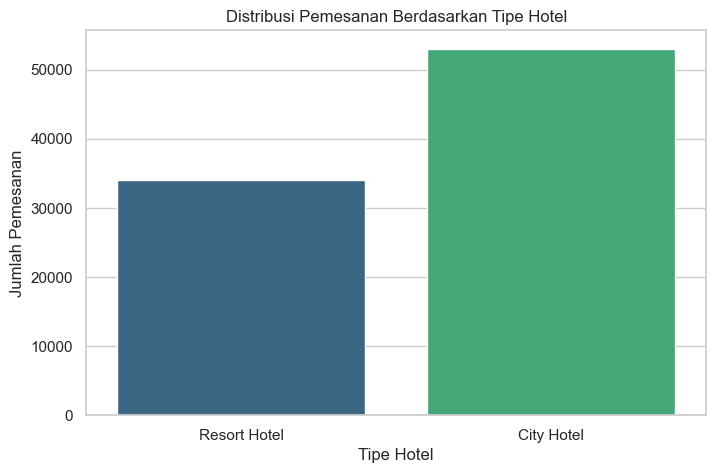

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='hotel', data=df, palette='viridis')
plt.title('Distribusi Pemesanan Berdasarkan Tipe Hotel')
plt.xlabel('Tipe Hotel')
plt.ylabel('Jumlah Pemesanan')
plt.show()

Visualisasi menunjukkan bahwa City Hotel memiliki jumlah pemesanan yang jauh lebih tinggi dibandingkan Resort Hotel. Hal ini menunjukkan adanya preferensi yang kuat dari pelanggan terhadap akomodasi di kawasan perkotaan, yang kemungkinan besar dipicu oleh keperluan perjalanan bisnis, akses transportasi yang lebih mudah, atau daya tarik wisata kota.

Sementara itu, Resort Hotel cenderung lebih musiman, dengan tingkat pemesanan yang meningkat saat akhir pekan panjang, musim liburan, atau musim panas. Pola ini mengindikasikan bahwa strategi promosi dan pengelolaan inventaris untuk kedua jenis hotel sebaiknya tidak disamakan.

Sebagai tindak lanjut strategis:
- Untuk City Hotel, fokuskan pada program loyalitas bisnis, kemitraan dengan perusahaan, dan penawaran untuk pelancong individual dengan kebutuhan fleksibel.
- Untuk Resort Hotel, maksimalkan promosi musiman, bundling akhir pekan (misalnya 3D2N + sarapan/spa), dan targeting keluarga atau pasangan yang mencari pengalaman relaksasi.

Dengan strategi yang tersegmentasi berdasarkan karakteristik demand tiap tipe hotel, manajemen dapat mengoptimalkan okupansi sepanjang tahun, menyesuaikan harga dengan siklus permintaan, dan mengurangi ketimpangan tingkat hunian antar lokasi.

### 4. Distribusi pembatalan berdasarkan Deposit Type

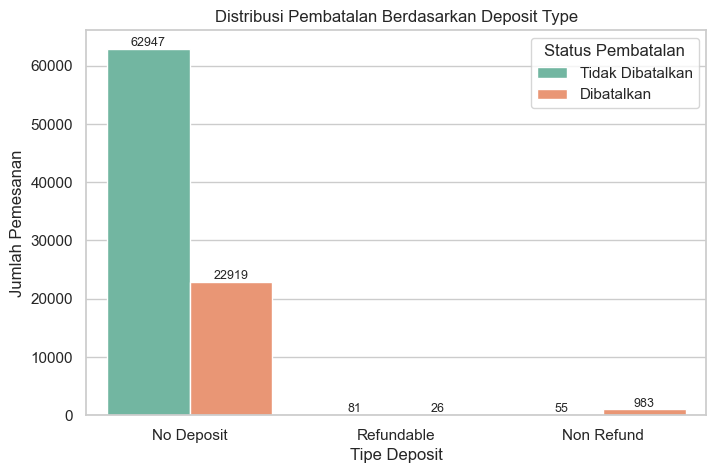

In [30]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='deposit_type', hue='is_canceled', data=df, palette='Set2')
plt.title('Distribusi Pembatalan Berdasarkan Deposit Type')
plt.xlabel('Tipe Deposit')
plt.ylabel('Jumlah Pemesanan')
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])

# Tambahkan label hanya jika height > 0
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

plt.show()


Visualisasi menunjukkan bahwa sebagian besar pelanggan menggunakan tipe deposit No Deposit, yang disertai tingkat pembatalan tinggi. Hal ini dapat dimengerti karena pelanggan tidak menanggung konsekuensi finansial jika membatalkan.

Namun, yang lebih mencolok adalah tingginya jumlah pembatalan pada kategori Non-Refundable, dengan 983 pemesanan dibatalkan, jauh melampaui jumlah pemesanan yang tetap (hanya 55). Padahal, deposit tipe ini dirancang untuk mencegah pembatalan dengan ketentuan tidak dikembalikannya dana.

Meskipun hotel tetap menerima pembayaran dari pemesanan non-refundable yang dibatalkan, volume pembatalan yang tinggi tetap berdampak negatif secara operasional. Setiap pembatalan berarti ada kamar yang tidak terpakai, padahal bisa dimanfaatkan untuk tamu lain—terutama di periode dengan permintaan tinggi. Ini menciptakan opportunity loss dan menyulitkan prediksi okupansi secara akurat.

Oleh karena itu, strategi deposit perlu diperkuat dengan pendekatan yang lebih terintegrasi:
- Gunakan deposit non-refundable secara selektif, hanya pada segmen dengan riwayat kepatuhan tinggi atau pada periode high-demand.
- Kombinasikan dengan reminder aktif dan transparansi syarat, agar tamu benar-benar memahami risiko pembatalan.
- Tambahkan insentif kecil (misalnya voucher F&B) bagi tamu yang tidak membatalkan, sebagai penyeimbang antara risiko dan komitmen.

Dengan pendekatan ini, hotel tidak hanya mengandalkan penalti finansial, tapi juga mendorong tamu untuk hadir, sehingga potensi revenue dan okupansi tetap optimal, bahkan dalam skema non-refundable sekalipun.

### 4.1 Pembatalan Deposit Non Refund Berdasarkan Segmentasi Pasar

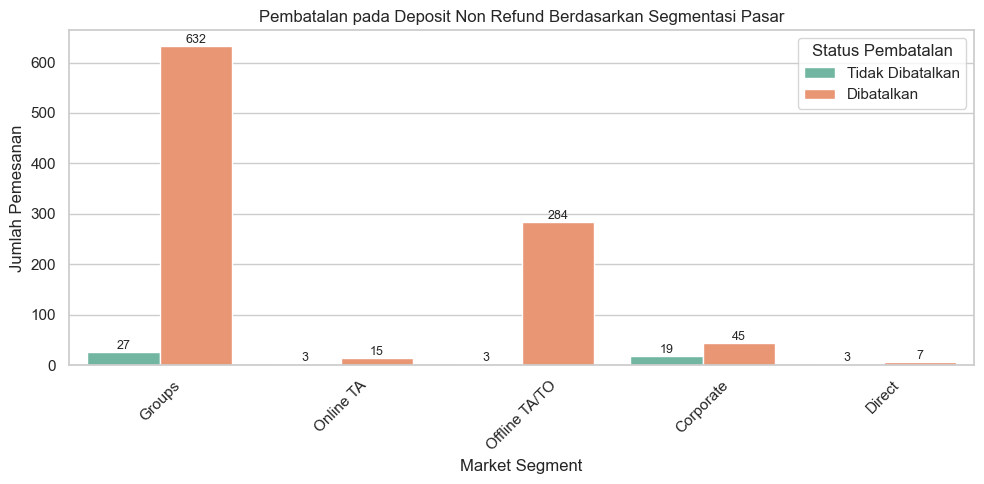

In [31]:
# Filter hanya Non Refund
non_refund_df = df[df['deposit_type'] == 'Non Refund']

# Visualisasi berdasarkan market_segment
plt.figure(figsize=(10, 5))
ax1 = sns.countplot(x='market_segment', hue='is_canceled', data=non_refund_df, palette='Set2')
plt.title('Pembatalan pada Deposit Non Refund Berdasarkan Segmentasi Pasar')
plt.xlabel('Market Segment')
plt.ylabel('Jumlah Pemesanan')
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])

for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(f'{height:.0f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Visualisasi menunjukkan bahwa tingkat pembatalan tertinggi berasal dari segmen Groups, di mana 632 dari 983 pemesanan dibatalkan. Segmen Offline TA/TO menempati posisi kedua dengan 284 pembatalan. Yang menarik, kedua segmen ini melakukan banyak pemesanan dengan deposit bertipe non-refundable, namun tetap menunjukkan angka pembatalan yang tinggi.

Temuan ini mengindikasikan bahwa kebijakan non-refundable tidak serta-merta efektif untuk semua segmen, terutama jika:
- Rencana pemesanan bersifat dinamis seperti pada grup (konferensi, tur, sekolah),
- Terdapat jarak komunikasi antara pihak hotel, agen, dan pelanggan akhir,
- Atau kurangnya pemahaman pelanggan mengenai konsekuensi pembatalan.

Oleh karena itu, strategi mitigasi pembatalan untuk segmen Groups dan Offline TA/TO perlu disesuaikan, misalnya:
- Meningkatkan komunikasi proaktif ke agen dengan materi edukasi visual tentang kebijakan pembatalan,
- Menerapkan kebijakan fleksibel terbatas, seperti konversi pembatalan menjadi voucher reschedule untuk pemesanan grup besar,
- Menjadwalkan reminder keagenan beberapa minggu sebelum masa inap agar keputusan akhir lebih cepat diambil.

Dengan pendekatan ini, hotel dapat tetap menjaga komitmen pemesanan dari segmen besar yang berisiko tinggi, tanpa kehilangan kepercayaan pelanggan ataupun potensi pendapatan.

### 4.2 Pembatalan Deposit Non Refund Berdasarkan Tipe Kamar

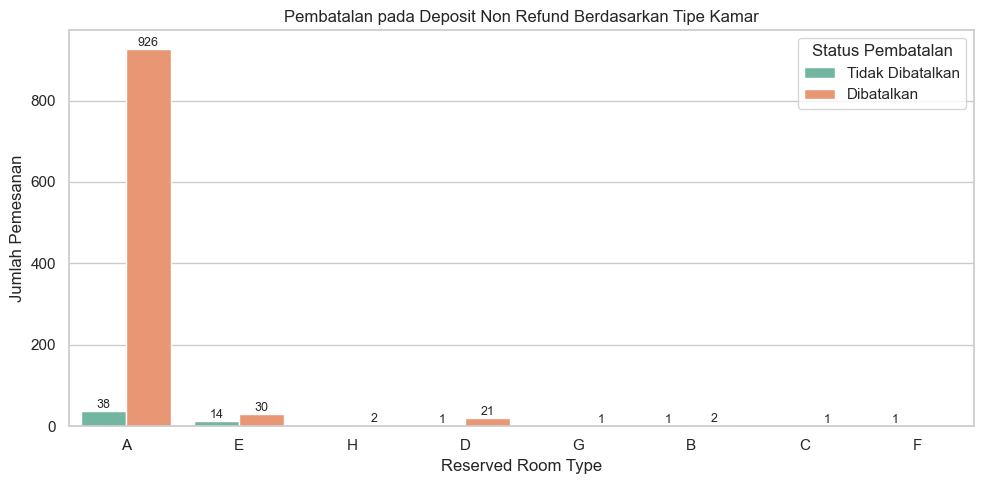

In [32]:
# Visualisasi berdasarkan reserved_room_type
plt.figure(figsize=(10, 5))
ax2 = sns.countplot(x='reserved_room_type', hue='is_canceled', data=non_refund_df, palette='Set2')
plt.title('Pembatalan pada Deposit Non Refund Berdasarkan Tipe Kamar')
plt.xlabel('Reserved Room Type')
plt.ylabel('Jumlah Pemesanan')
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])

for p in ax2.patches:
    height = p.get_height()
    if height > 0:
        ax2.annotate(f'{height:.0f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Data menunjukkan bahwa pembatalan terbanyak berasal dari Room Type A, dengan total 926 pembatalan. Kemungkinan besar tipe kamar ini adalah kategori standar atau paling ekonomis, yang umumnya menarik pelanggan yang lebih sensitif terhadap perubahan harga, rencana, atau kebutuhan. Tamu di segmen ini juga mungkin melakukan booking dalam jumlah besar tanpa kepastian penggunaan, misalnya untuk acara kelompok atau liburan fleksibel.

Meskipun penerapan kebijakan Non-Refundable sering dianggap sebagai solusi untuk mencegah pembatalan, data ini menunjukkan bahwa non-refundable tidak selalu efektif secara universal. Bahkan segmen tertentu tetap menunjukkan kecenderungan tinggi untuk membatalkan, meskipun harus menanggung kerugian finansial.

Oleh karena itu, strategi non-refundable perlu ditinjau ulang secara selektif dan berbasis data:
- Terapkan hanya pada segmen dengan riwayat kepatuhan tinggi (misalnya pelanggan repeat dengan tingkat cancelation rendah),
- Kombinasikan dengan komunikasi ulang yang lebih jelas mengenai syarat pembatalan,
- Atau tawarkan opsi insentif alternatif (misalnya voucher menginap di lain waktu) untuk mengurangi beban tamu sekaligus mempertahankan potensi revenue.

Pendekatan berbasis segmentasi dan perilaku historis ini akan lebih efektif dalam mengelola pembatalan, dibandingkan kebijakan seragam yang tidak mempertimbangkan variasi preferensi dan risiko pembatalan di tiap jenis kamar.

#### 5. Analisis `Lead Time` terhadap Pembatalan

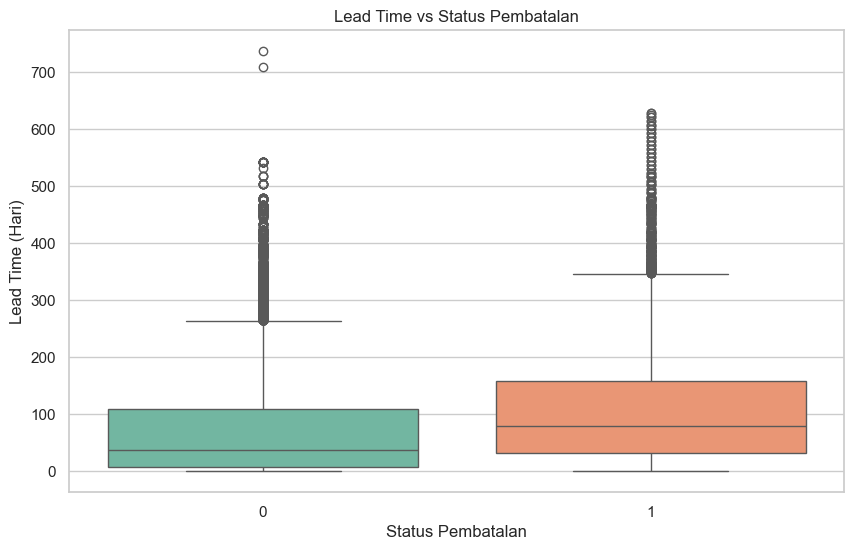

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='Set2')
plt.title('Lead Time vs Status Pembatalan')
plt.xlabel('Status Pembatalan')
plt.ylabel('Lead Time (Hari)')
plt.show()

Boxplot menunjukkan bahwa pemesanan yang dibatalkan memiliki median `lead_time` yang jauh lebih tinggi dibandingkan pemesanan yang terealisasi. Sebagai contoh, median `lead_time` untuk reservasi yang dibatalkan berada di kisaran 100 hari, sementara reservasi yang tidak dibatalkan hanya sekitar 30 hari. Hal ini mengindikasikan bahwa semakin jauh jarak waktu antara pemesanan dan tanggal kedatangan, semakin besar pula kemungkinan pembatalan terjadi.

Pelanggan dengan `lead_time` panjang umumnya memesan jauh-jauh hari dan lebih rentan melakukan perubahan rencana, baik karena ketidakpastian agenda, penyesuaian anggaran, atau perubahan kondisi eksternal. Sebaliknya, pemesanan dengan `lead_time` pendek biasanya dilakukan karena kebutuhan yang mendesak atau rencana perjalanan yang lebih pasti.

Temuan ini memberikan dasar yang kuat untuk menerapkan strategi mitigasi pembatalan berbasis lead time, seperti:
- Penawaran non-refundable atau deposit sebagian untuk pemesanan dengan lead_time di atas ambang tertentu (misal, 60 hari),
- Pengingat otomatis dan personalisasi (misal: email reminder + rekomendasi aktivitas) untuk menjaga keterikatan pelanggan terhadap reservasinya,
- Kebijakan refund bertingkat, di mana semakin dekat dengan tanggal menginap, semakin kecil pengembalian dana.

Dengan menerapkan strategi berbasis lead time ini, hotel dapat mengurangi pembatalan dini secara signifikan, menjaga kestabilan okupansi, dan sekaligus memaksimalkan pendapatan dari pemesanan bernilai tinggi yang berisiko dibatalkan.

#### 6. Distribusi `ADR` (Average Daily Rate)

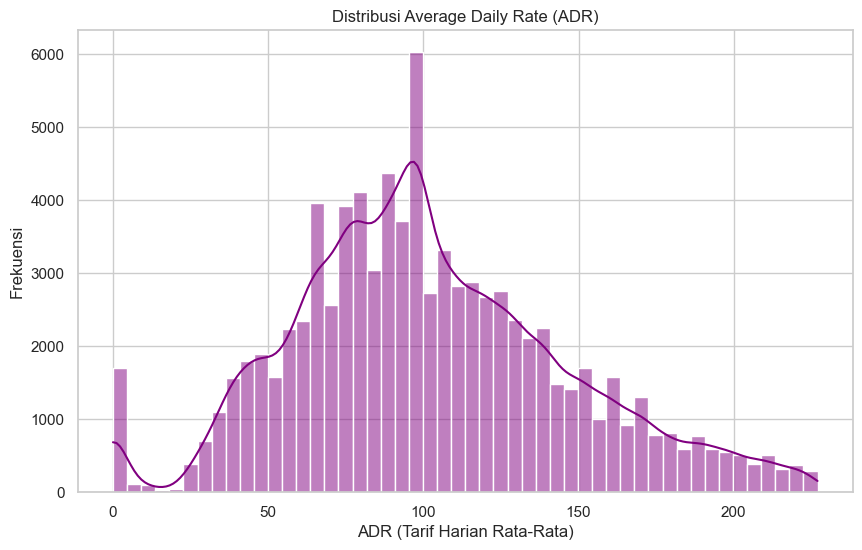

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], bins=50, kde=True, color='purple')
plt.title('Distribusi Average Daily Rate (ADR)')
plt.xlabel('ADR (Tarif Harian Rata-Rata)')
plt.ylabel('Frekuensi')
plt.show()

Distribusi ADR (Average Daily Rate) menunjukkan pola right-skewed, dengan puncak kepadatan pada kisaran 50–100, menandakan bahwa sebagian besar pemesanan berada pada segmen harga menengah (mid-range). Ini mengindikasikan bahwa target pasar utama hotel adalah pelanggan dengan preferensi harga moderat, bukan dari segmen budget ekstrem maupun kelas luxury.

Nilai-nilai ADR yang sangat tinggi (di atas 300) ditemukan dalam jumlah kecil, yang kemungkinan berasal dari pemesanan untuk kamar premium atau suite. Namun demikian, distribusi yang sangat miring ke kanan juga bisa dipengaruhi oleh outlier atau data error, meskipun hal ini telah ditangani dalam proses data cleaning.

Temuan ini dapat digunakan oleh tim revenue management untuk:
- Menetapkan strategi dynamic pricing yang fokus pada segmen harga 50–100 sebagai zona kompetitif utama.
- Merancang paket upsell secara strategis ke pelanggan mid-range untuk menggeser sebagian pemesanan ke segmen yang lebih tinggi (misalnya dari ADR 90 -> 120) melalui bundling sarapan, upgrade kamar, atau layanan tambahan.
- Memastikan validasi berkala terhadap nilai ADR ekstrem untuk menghindari kesalahan entri harga dan menjaga integritas sistem pelaporan.

Dengan memahami distribusi ADR ini, hotel dapat menyusun strategi penetapan harga yang lebih presisi, menargetkan promosi sesuai profil pasar aktual, dan mengoptimalkan pendapatan tanpa mengorbankan volume pemesanan.

#### 6.1 Harga rata-rata per Malam

In [35]:
df['adr'].mean()

101.89777269540632

#### 6.2 Perbandingan ADR tamu yang canceled dan tidak

In [36]:
df.groupby('is_canceled')['adr'].mean()

is_canceled
0     98.331854
1    111.298846
Name: adr, dtype: float64

#### 6.3 Perbandingan ADR City Hotel vs Resort Hotel

In [37]:
df.groupby('hotel')['adr'].mean()

hotel
City Hotel      109.023272
Resort Hotel     90.764443
Name: adr, dtype: float64

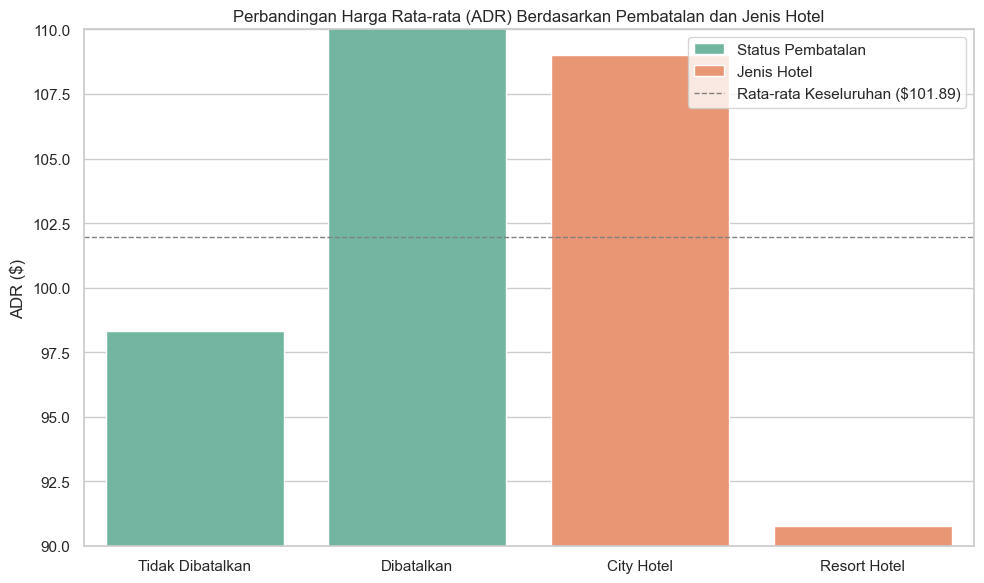

In [38]:
# Data berdasarkan informasi diatas
data = {
    'Kategori': ['Tidak Dibatalkan', 'Dibatalkan', 'City Hotel', 'Resort Hotel'],
    'ADR ($)': [98.331854, 111.298846, 109.023272, 90.764443],
    'Tipe': ['Status Pembatalan', 'Status Pembatalan', 'Jenis Hotel', 'Jenis Hotel']
}

df_plot = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Kategori', y='ADR ($)', hue='Tipe', palette='Set2')

plt.title('Perbandingan Harga Rata-rata (ADR) Berdasarkan Pembatalan dan Jenis Hotel')
plt.ylabel('ADR ($)')
plt.xlabel('')
plt.ylim(90, 110)
plt.axhline(101.97, color='gray', linestyle='--', linewidth=1, label='Rata-rata Keseluruhan ($101.89)')
plt.legend()
plt.tight_layout()
plt.show()


Data menunjukkan bahwa rata-rata harga kamar (ADR) pada reservasi yang dibatalkan lebih tinggi dibandingkan reservasi yang tidak dibatalkan. Hal ini mengindikasikan bahwa pelanggan yang membatalkan reservasi cenderung memesan kamar lebih mahal, baik karena dilakukan saat high season maupun karena memilih tipe kamar yang lebih premium, namun akhirnya tidak jadi menginap.

Selain itu, analisis menunjukkan bahwa City Hotel memiliki ADR yang lebih tinggi dibandingkan Resort Hotel, meskipun secara umum resort dianggap lebih eksklusif. Hal ini kemungkinan besar karena lokasi City Hotel yang strategis — dekat pusat bisnis, transportasi, dan kawasan komersial — sehingga menarik tamu korporat dan pelancong yang bersedia membayar lebih. Sementara Resort Hotel justru memiliki ADR di bawah rata-rata, yang bisa disebabkan oleh faktor-faktor seperti penawaran diskon musiman, lokasi resort yang kurang populer, atau promosi khusus.

Yang menarik, ADR City Hotel hampir setara dengan ADR rata-rata dari reservasi yang dibatalkan, yang membuka kemungkinan bahwa City Hotel memiliki tingkat pembatalan yang lebih tinggi, terutama dari tamu bisnis yang memiliki fleksibilitas tinggi dan sering melakukan perubahan jadwal mendadak.

Berdasarkan temuan ini, disarankan untuk:
- Menerapkan strategi early confirmation atau prepayment khusus untuk reservasi di City Hotel, terutama yang dilakukan jauh-jauh hari.
- Menyesuaikan penawaran pada Resort Hotel, seperti menaikkan harga pada musim ramai atau mengoptimalkan promosi agar tidak terlalu undervalued.
- Membuat paket fleksibel untuk pelancong bisnis (misalnya, reschedule tanpa biaya) sambil tetap menjaga komitmen reservasi agar mengurangi pembatalan mendadak.

Dengan strategi ini, manajemen dapat mengurangi risiko pembatalan pada kamar high-ADR, sekaligus mengoptimalkan pricing sesuai karakteristik masing-masing jenis hotel.

#### 6.4 Perbadingan ADR dengan Tipe Kamar

In [39]:
df.groupby('reserved_room_type')['adr'].mean()

reserved_room_type
A     91.536856
B     90.747105
C    129.986477
D    118.763156
E    116.619198
F    142.413510
G    127.392655
H    134.370520
L    124.666667
Name: adr, dtype: float64

In [40]:
df.groupby(['is_canceled', 'reserved_room_type'])['adr'].mean()

is_canceled  reserved_room_type
0            A                      89.023168
             B                      88.226275
             C                     126.287573
             D                     114.113876
             E                     112.449364
             F                     136.437392
             G                     125.599901
             H                     133.429320
             L                     151.000000
1            A                      98.684624
             B                      96.604328
             C                     137.709189
             D                     129.544867
             E                     127.737910
             F                     156.226698
             G                     130.590870
             H                     135.737778
             L                      72.000000
Name: adr, dtype: float64

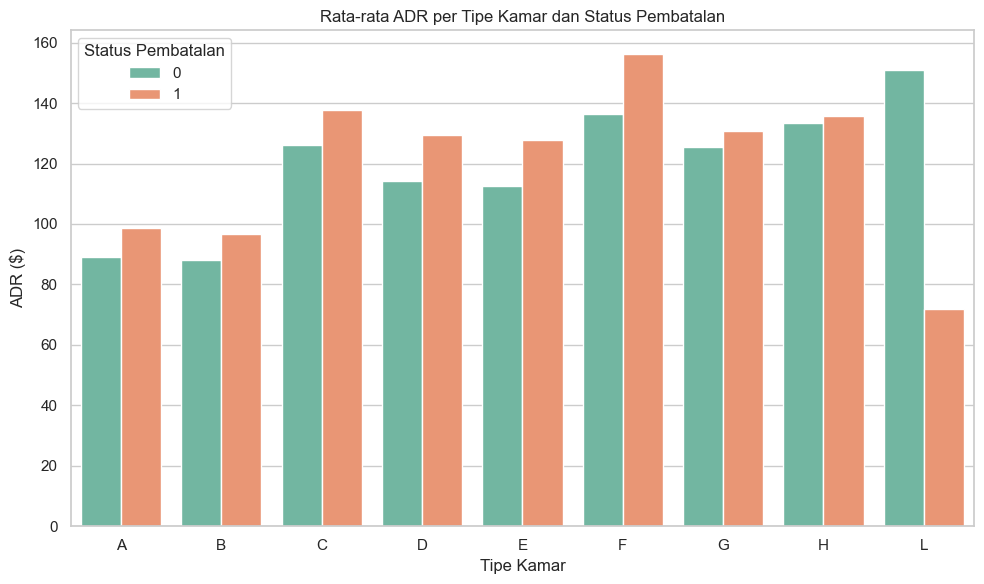

In [41]:
# Barplot
# Data dari hasil groupby
data = {
    ('0', 'A'): 89.023168,
    ('0', 'B'): 88.226275,
    ('0', 'C'): 126.287573,
    ('0', 'D'): 114.113876,
    ('0', 'E'): 112.449364,
    ('0', 'F'): 136.437392,
    ('0', 'G'): 125.599901,
    ('0', 'H'): 133.429320,
    ('0', 'L'): 151.000000,
    ('1', 'A'): 98.684624,
    ('1', 'B'): 96.604328,
    ('1', 'C'): 137.709189,
    ('1', 'D'): 129.544867,
    ('1', 'E'): 127.737910,
    ('1', 'F'): 156.226698,
    ('1', 'G'): 130.598070,
    ('1', 'H'): 135.737778,
    ('1', 'L'): 72.000000,
}

df_plot = pd.DataFrame([
    {"is_canceled": int(k[0]), "reserved_room_type": k[1], "adr": v}
    for k, v in data.items()
])

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_plot,
    x='reserved_room_type',
    y='adr',
    hue='is_canceled',
    palette='Set2'
)
plt.title('Rata-rata ADR per Tipe Kamar dan Status Pembatalan')
plt.ylabel('ADR ($)')
plt.xlabel('Tipe Kamar')
plt.legend(title='Status Pembatalan')
plt.tight_layout()
plt.show()


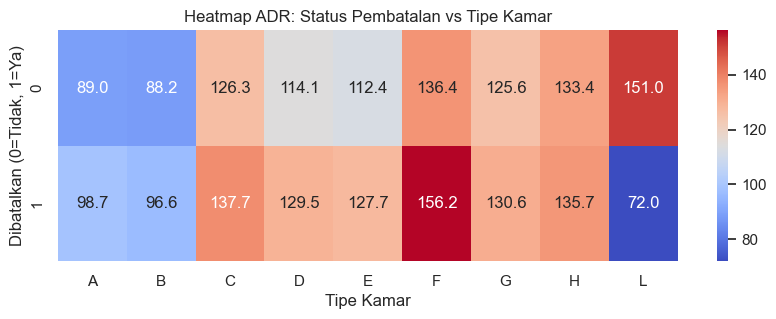

In [42]:
# Heatmap
pivot = df_plot.pivot(index='is_canceled', columns='reserved_room_type', values='adr')

plt.figure(figsize=(10, 3))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Heatmap ADR: Status Pembatalan vs Tipe Kamar')
plt.ylabel('Dibatalkan (0=Tidak, 1=Ya)')
plt.xlabel('Tipe Kamar')
plt.show()


Analisis menunjukkan bahwa untuk hampir semua tipe kamar, rata-rata harga kamar (ADR) pada reservasi yang dibatalkan lebih tinggi dibandingkan yang tidak dibatalkan. Misalnya, Room Type A memiliki ADR sebesar 98.7 saat dibatalkan dan hanya 89.0 saat tidak dibatalkan. Demikian pula Room Type F, dengan ADR 156.2 saat dibatalkan dan 136.4 saat tidak. Temuan ini mengindikasikan bahwa pelanggan yang membatalkan reservasi cenderung memesan kamar yang lebih mahal, kemungkinan karena pemesanan dilakukan saat peak season atau jauh-jauh hari, atau berasal dari segmen tamu premium yang lebih sensitif terhadap perubahan rencana.

Namun terdapat pengecualian pada Room Type L, di mana ADR justru lebih rendah saat dibatalkan (72.0) dibandingkan yang tidak dibatalkan (151.0). Karena data ini hanya mencakup dua reservasi yang dibatalkan, maka angka tersebut tidak dapat dijadikan dasar untuk mengambil kesimpulan yang sah. Oleh karena itu, Room Type L sebaiknya tidak dimasukkan dalam interpretasi agregat tanpa validasi data lebih lanjut.

Room Type F dan L terlihat sebagai tipe kamar dengan harga tertinggi, namun keduanya juga menunjukkan risiko pembatalan yang relatif tinggi. Untuk mengurangi potensi kerugian dari pembatalan kamar premium ini, disarankan untuk menerapkan kebijakan non-refundable atau prepayment, serta memberikan insentif loyalitas seperti poin tambahan atau diskon eksklusif bagi tamu yang menyelesaikan reservasi tanpa pembatalan.

Sebagai langkah strategis, hotel sebaiknya melakukan segmentasi ulang terhadap pricing dan kebijakan pembatalan berdasarkan tipe kamar. Selain itu, validasi data untuk Room Type L perlu dilakukan agar tidak mempengaruhi akurasi analisis dan perumusan kebijakan.

memastikan bahwa ADR $72 pada Room Type L yang dibatalkan (dari hasil groupby) itu valid dan bukan outlier karena jumlah data yang terlalu kecil

In [43]:
# Cek jumlah reservasi untuk room type L yang dibatalkam
df[(df['is_canceled'] == 1) & (df['reserved_room_type'] == 'L')].shape[0]

2

In [44]:
# Cek Jumlah reservasi untuk keseluurhan room type
df.groupby(['is_canceled', 'reserved_room_type']).size()

is_canceled  reserved_room_type
0            A                     41746
             B                       553
             C                       618
             D                     12140
             E                      4389
             F                      1967
             G                      1313
             H                       353
             L                         4
1            A                     14681
             B                       238
             C                       296
             D                      5235
             E                      1646
             F                       851
             G                       736
             H                       243
             L                         2
dtype: int64

In [45]:
df.loc[(df['is_canceled'] == 1) & (df['reserved_room_type'] == 'L'), 'adr'].describe()

count      2.000000
mean      72.000000
std       90.509668
min        8.000000
25%       40.000000
50%       72.000000
75%      104.000000
max      136.000000
Name: adr, dtype: float64

Jumlah reservasi untuk Room Type L sangat rendah, hanya 6 pemesanan selama periode data, dengan 4 di antaranya tidak dibatalkan dan 2 lainnya dibatalkan. Nilai rata-rata ADR untuk Room Type L yang dibatalkan memang tercatat sebesar 72, namun angka ini berasal dari hanya dua data poin yang sangat ekstrem (8 dan 136), dengan standar deviasi mencapai 90.5. Ini berarti sebaran nilainya sangat lebar dan tidak representatif untuk ditarik kesimpulan statistik yang valid.

Temuan ini menjadi penting karena jika Room Type L disertakan dalam analisis kuantitatif atau visualisasi seperti barplot, bisa mengaburkan interpretasi keseluruhan, khususnya ketika dibandingkan dengan room type lain yang memiliki jumlah data jauh lebih banyak. Oleh karena itu, disarankan untuk:

Menambahkan penanda khusus atau mengecualikan Room Type L dari visualisasi agregat seperti rata-rata ADR per tipe kamar, agar tidak memicu kesimpulan yang bias.

Memberikan catatan atau footnote dalam presentasi yang menjelaskan bahwa Room Type L memiliki jumlah data yang sangat kecil, sehingga tidak mewakili populasi secara valid.

Jika Room Type L adalah produk baru atau jarang ditawarkan, tim produk atau pricing bisa melakukan investigasi lebih lanjut untuk melihat potensi pengembangannya atau mengapa permintaannya sangat rendah.

Dengan menjaga integritas analisis dan visualisasi, tim dapat menyampaikan insight yang lebih akurat dan menghindari pengambilan keputusan yang keliru akibat anomali data.

#### 7. Korelasi antara Variabel Numerik

In [46]:
# Memilih kolom numerik untuk analisis korelasi
numeric_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                'adults', 'children', 'babies', 'adr', 'total_stays', 'total_guests', 
                'booking_changes', 'days_in_waiting_list', 'total_of_special_requests']

In [47]:
# Menghitung matriks korelasi
corr_matrix = df[numeric_cols].corr()

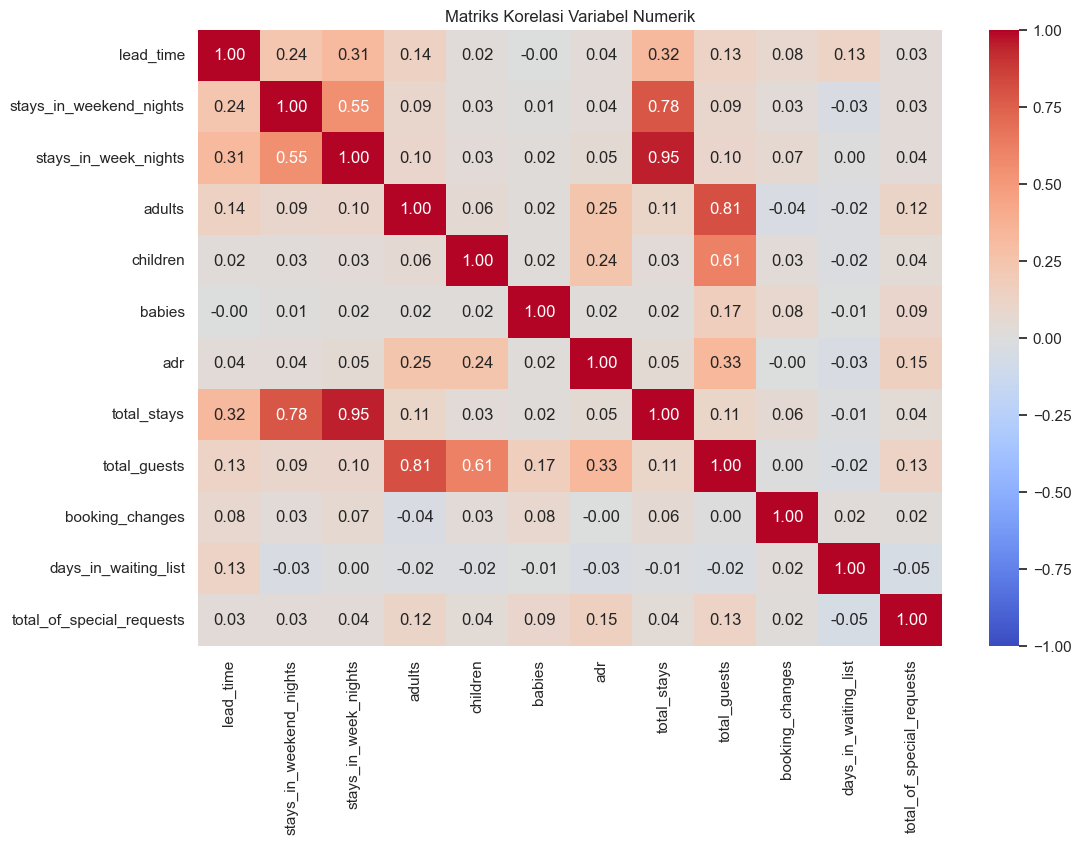

In [48]:
# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

Visualisasi heatmap menunjukkan beberapa pola korelasi yang relevan untuk pengambilan keputusan. Pertama, terdapat korelasi tinggi antara `total_stays` dan `stays_in_week_nights`, mengindikasikan bahwa mayoritas malam menginap terjadi pada hari kerja. Ini bisa menjadi sinyal bahwa pasar utama hotel berasal dari tamu yang melakukan perjalanan bisnis atau weekday traveler, bukan hanya weekend getaway.

Korelasi positif antara `total_guests` dan `adr` menunjukkan bahwa pemesanan dengan lebih banyak tamu cenderung menghasilkan pendapatan per malam yang lebih tinggi. Ini membuka peluang untuk mendorong pemesanan grup kecil atau keluarga, dengan strategi bundling atau upselling layanan tambahan.

Sementara itu, korelasi negatif antara `lead_time` dan `total_of_special_requests` menunjukkan bahwa pemesanan dengan waktu tunggu yang panjang (booking jauh-jauh hari) lebih cenderung mengajukan permintaan khusus. Sebaliknya, last-minute booking cenderung minim permintaan tambahan. Pola ini bisa dimanfaatkan untuk meningkatkan kepuasan pelanggan long-lead dengan konfirmasi personal terhadap permintaan khusus mereka, serta menawarkan upsell pada saat reservasi dibuat.

Secara keseluruhan, pemahaman atas korelasi ini memungkinkan tim operasional dan pemasaran untuk menyesuaikan strategi layanan, penjadwalan staf, dan pendekatan promosi sesuai karakteristik tamu dari berbagai jalur booking

#### 8. Analisis Musiman Berdasarkan Bulan Kedatangan

In [49]:
# Mengurutkan bulan untuk visualisasi
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

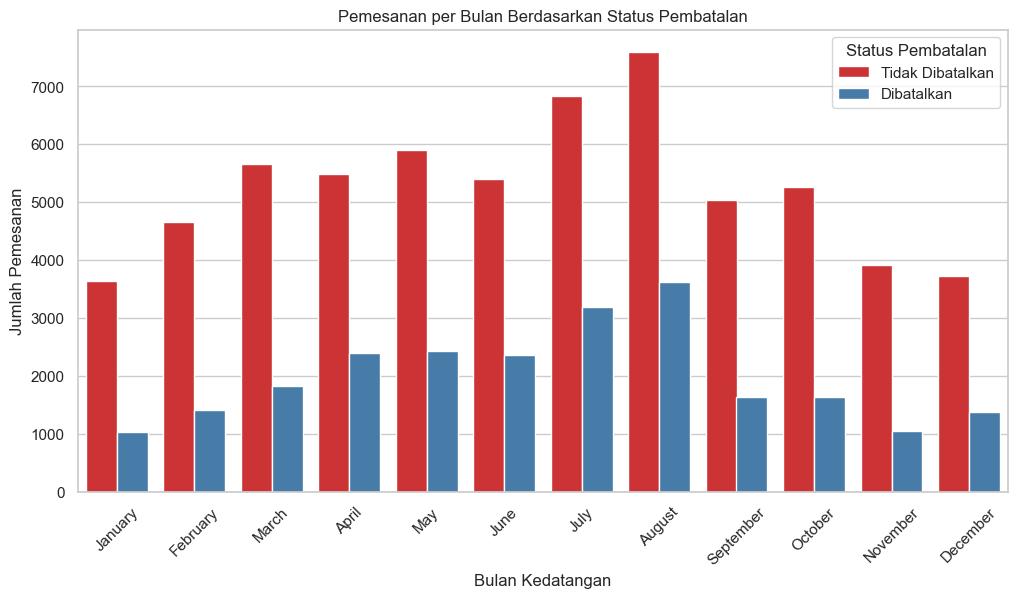

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', hue='is_canceled', data=df, palette='Set1')
plt.title('Pemesanan per Bulan Berdasarkan Status Pembatalan')
plt.xlabel('Bulan Kedatangan')
plt.ylabel('Jumlah Pemesanan')
plt.xticks(rotation=45)
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])
plt.show()

Countplot berdasarkan bulan kedatangan menunjukkan bahwa jumlah pemesanan mencapai puncaknya pada bulan Juli dan Agustus. Pola ini konsisten dengan periode musim liburan di banyak negara, yang mendorong permintaan tinggi terhadap akomodasi. Namun, pada beberapa bulan tersebut juga terlihat tingkat pembatalan yang cukup tinggi, yang kemungkinan dipengaruhi oleh faktor eksternal seperti perubahan rencana liburan, cuaca ekstrem, atau event besar yang dibatalkan atau dipindahkan.

Untuk mengantisipasi risiko pembatalan di bulan-bulan dengan permintaan tinggi, tim revenue management disarankan untuk menerapkan kebijakan pembatalan yang lebih ketat atau model non-refundable secara selektif pada bulan-bulan tersebut. Selain itu, strategi seperti pengingat H-3 sebelum check-in, atau penawaran insentif bagi tamu yang tidak membatalkan, dapat digunakan untuk menurunkan tingkat cancelation.

Di sisi operasional, pola musiman ini juga penting untuk perencanaan kapasitas: baik dari sisi jumlah staf, ketersediaan kamar, hingga kesiapan fasilitas tambahan (seperti F&B atau layanan tur). Dengan pendekatan yang terencana, hotel dapat mengoptimalkan pendapatan di high season, sekaligus meminimalkan potensi kerugian akibat pembatalan mendadak.

#### 8.1 Bulan dan ADR

In [51]:
df.groupby(['arrival_date_month', 'is_canceled'])['adr'].mean()

arrival_date_month  is_canceled
January             0               67.296464
                    1               80.194840
February            0               72.726559
                    1               80.782930
March               0               77.725016
                    1               89.940984
April               0               98.200679
                    1              111.599725
May                 0              105.056065
                    1              118.558977
June                0              114.238000
                    1              122.972991
July                0              125.578045
                    1              129.287753
August              0              128.943295
                    1              135.669346
September           0              108.893500
                    1              115.781554
October             0               87.169827
                    1               97.946506
November            0               70.597008
  

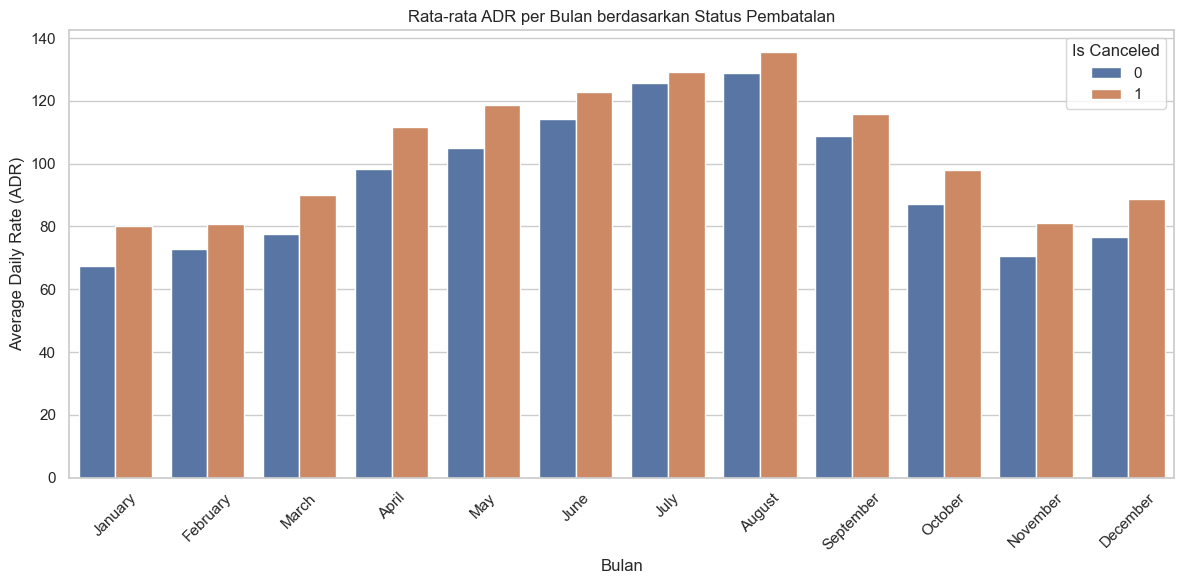

In [52]:
# Barplot

# Hitung rata-rata adr per bulan dan is_canceled
adr_by_month_cancel = df.groupby(['arrival_date_month', 'is_canceled'])['adr'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=adr_by_month_cancel, x='arrival_date_month', y='adr', hue='is_canceled')
plt.title('Rata-rata ADR per Bulan berdasarkan Status Pembatalan')
plt.xlabel('Bulan')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Is Canceled')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Data menunjukkan bahwa rata-rata harga kamar (ADR) untuk reservasi yang dibatalkan justru lebih tinggi dibandingkan reservasi yang terealisasi. Contohnya pada bulan Agustus, ADR untuk pemesanan yang dibatalkan mencapai 135.7, sedangkan yang tidak dibatalkan hanya 128.9. Tren serupa terlihat di hampir semua bulan, mengindikasikan bahwa pelanggan dengan tarif kamar lebih tinggi justru lebih rentan membatalkan. Hal ini kemungkinan disebabkan karena mereka memesan jauh-jauh hari atau berasal dari segmen yang lebih sensitif terhadap perubahan rencana.

Selain itu, ADR tertinggi terjadi saat musim liburan seperti bulan Juni hingga Agustus, sedangkan bulan-bulan seperti Januari dan November memiliki ADR yang jauh lebih rendah. Ini menunjukkan bahwa periode puncak pendapatan juga berisiko tinggi terhadap pembatalan.

Untuk menanggulangi risiko tersebut, disarankan tim bisnis untuk menerapkan strategi early-bird non-refundable khusus untuk pelanggan dengan ADR tinggi, serta mengirimkan pengingat personal menjelang check-in guna mengurangi kemungkinan pembatalan. Strategi ini ditargetkan mampu menurunkan tingkat pembatalan pada reservasi bernilai tinggi hingga 20–30%.

Di sisi lain, saat low season seperti Januari atau November, promosi berbasis bundling, diskon untuk long-stay, atau penawaran khusus untuk wisatawan domestik dapat digunakan untuk mendorong okupansi. Pendekatan ini berpotensi meningkatkan pendapatan rata-rata per kamar di periode sepi hingga 10–15%.

Selain itu, analisis lanjutan yang menggabungkan ADR, lead time, dan status pembatalan dapat menjadi dasar dalam menyusun sistem dynamic pricing yang lebih adaptif. Kebijakan seperti deposit atau asuransi pembatalan dapat diterapkan secara selektif untuk pemesanan yang berisiko tinggi, sehingga pendapatan tetap terjaga meski ada fluktuasi musiman dan potensi cancelation yang besar.

#### 9. Analisis Segmen Pasar

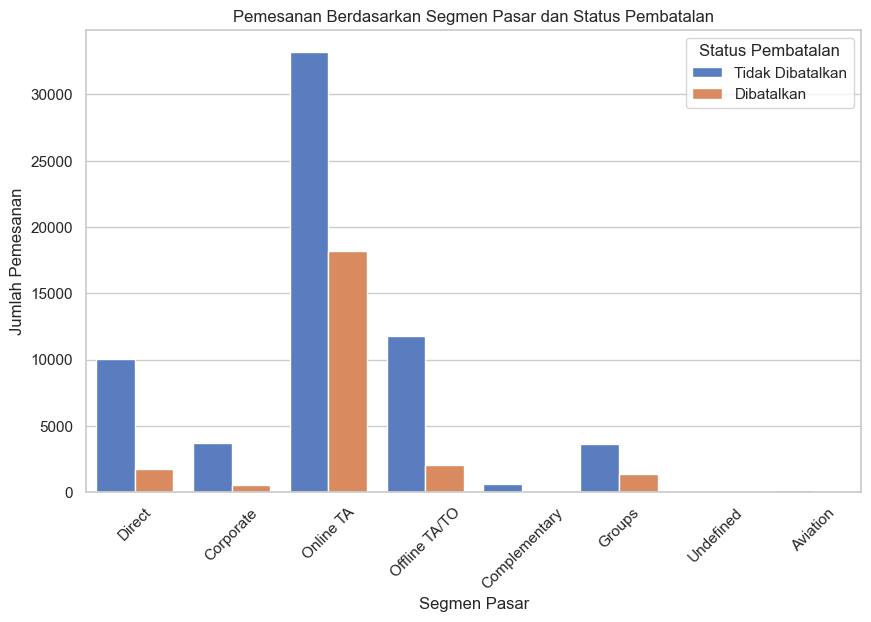

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=df, palette='muted')
plt.title('Pemesanan Berdasarkan Segmen Pasar dan Status Pembatalan')
plt.xlabel('Segmen Pasar')
plt.ylabel('Jumlah Pemesanan')
plt.xticks(rotation=45)
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])
plt.show()

Segmen Online TA tercatat memiliki jumlah pembatalan tertinggi dibandingkan dengan segmen lainnya. Hal ini kemungkinan besar disebabkan oleh kemudahan pembatalan melalui platform online dan minimnya konsekuensi finansial bagi pelanggan. Sebaliknya, segmen Direct menunjukkan tingkat pembatalan yang lebih rendah, yang dapat mencerminkan loyalitas lebih tinggi atau komitmen karena adanya interaksi langsung dengan pihak hotel.

Untuk mengurangi tingkat pembatalan dari pelanggan Online TA, kami menyarankan penerapan strategi mitigasi seperti penawaran harga spesial untuk tipe pemesanan non-refundable atau pemberian insentif kecil (misal: voucher minibar) bagi tamu yang menyelesaikan reservasi tanpa membatalkan. Strategi ini ditargetkan dapat menurunkan pembatalan dari segmen Online TA hingga 25% sekaligus mendorong peningkatan direct booking sebagai alternatif yang lebih stabil bagi bisnis hotel.

#### 9.1 Segmen Pasar dan ADR

In [54]:
df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)

market_segment
Online TA        112.897386
Direct           107.979684
Aviation         100.613628
Offline TA/TO     80.980605
Groups            74.169053
Corporate         68.122012
Undefined         15.000000
Complementary      3.102573
Name: adr, dtype: float64

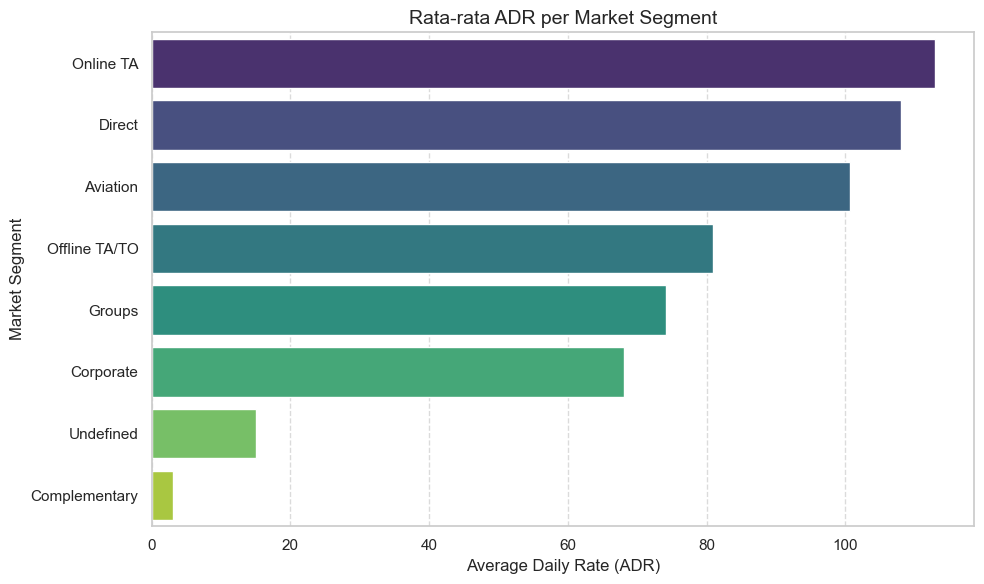

In [55]:
# Barplot

# Hitung rata-rata ADR per market segment
adr_by_segment = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)

# Buat barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=adr_by_segment.values, y=adr_by_segment.index, palette='viridis')

plt.title('Rata-rata ADR per Market Segment', fontsize=14)
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Market Segment')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Segment Online TA dan Direct booking memiliki rata-rata pendapatan per malam (ADR) tertinggi, yaitu 112 dan 107 Untuk mengoptimalkan potensi revenue, tim bisnis disarankan untuk memperkuat kampanye promosi ke dua segment ini, seperti melalui diskon khusus direct booking atau loyalty program di OTA. Strategi ini ditargetkan dapat meningkatkan kontribusi revenue dari dua segment tersebut hingga 20%.

Di sisi lain, segment Corporate dan Group memang memiliki ADR rendah, namun stabilitas volumenya dapat dimanfaatkan dengan memberikan paket bundling (misalnya: kamar + meeting room + F&B) guna meningkatkan nilai per reservasi. Pendekatan ini diperkirakan mampu menambah pendapatan rata-rata per reservasi sebesar 15%.

Segment dengan ADR sangat rendah seperti Complementary dan Undefined perlu segera dievaluasi. Pembersihan data Undefined dan pembatasan pemberian kamar gratis hanya untuk kebutuhan strategis dapat mencegah potensi kerugian hingga 200 per kuartal.

#### 9.2 Market Segment dan Lead Time

In [56]:
df.groupby('market_segment')['lead_time'].mean()

market_segment
Aviation           4.296460
Complementary     13.672965
Corporate         16.252381
Direct            48.798400
Groups           147.915888
Offline TA/TO    106.166979
Online TA         79.777438
Undefined          1.500000
Name: lead_time, dtype: float64

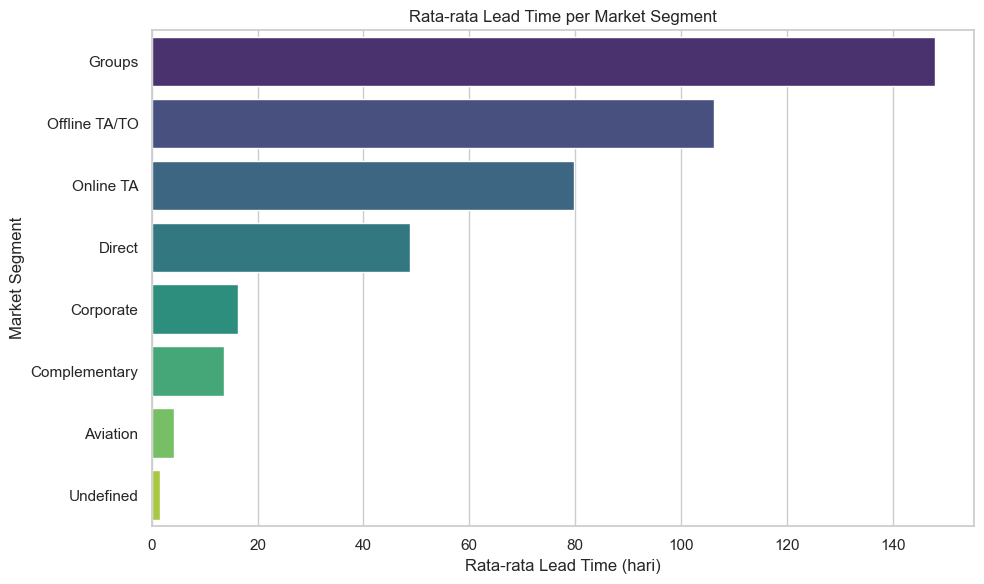

In [57]:
# Data lead time per market segment
data = {
    'market_segment': [
        'Groups', 'Offline TA/TO', 'Online TA', 'Direct',
        'Corporate', 'Complementary', 'Aviation', 'Undefined'
    ],
    'lead_time': [
        147.915888, 106.166979, 79.777438, 48.798400,
        16.252381, 13.672965, 4.296460, 1.5
    ]
}

dataLead = pd.DataFrame(data)

# Urutkan dari lead_time tertinggi
dataLead = dataLead.sort_values(by='lead_time', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='lead_time', y='market_segment', data=dataLead, palette='viridis')

plt.title('Rata-rata Lead Time per Market Segment')
plt.xlabel('Rata-rata Lead Time (hari)')
plt.ylabel('Market Segment')
plt.tight_layout()
plt.show()


Analisis terhadap `lead_time` berdasarkan segmentasi pasar menunjukkan perbedaan perilaku pemesanan yang signifikan:
1. Group bookings memiliki rata-rata lead time terpanjang (~148 hari), menandakan bahwa pemesanan dari grup seperti tur atau konferensi dilakukan jauh-jauh hari dan bersifat terencana.
2. Online TA dan Offline TA/TO juga menunjukkan pola pemesanan awal, sesuai dengan karakteristik pelanggan yang merencanakan perjalanan lebih matang.
3. Corporate, Aviation, dan Complementary memiliki lead time pendek, cenderung melakukan pemesanan mendekati tanggal menginap, karena sifatnya mendadak, operasional, atau berbasis kebutuhan khusus.

Perbedaan ini memberikan peluang untuk mengoptimalkan strategi bisnis berdasarkan waktu pemesanan.

Rekomendasi Strategis:
1. Terapkan strategi harga berdasarkan lead time:
    - Segment seperti Group, Online TA, dan Offline TA/TO:
        - Berikan early bird discount atau paket bundling (kamar + F&B).
        - Tujuan: mengunci reservasi lebih awal dan mengamankan okupansi jauh hari.
    - Segment seperti Corporate dan Aviation:
        - Fokus pada last-minute pricing, fleksibilitas dalam reschedule, dan check-in cepat.
        - Tujuan: menangkap peluang permintaan mendadak dengan margin tinggi.
2. Integrasikan data lead time dalam sistem perencanaan operasional:
    - Gunakan pola booking dari tiap segment untuk:
        - Menyusun jadwal staf housekeeping dan front office,
        - Mengelola alokasi kamar dan inventory logistik (seperti snack conference atau shuttle service),
        - Mengurangi risiko overbooking saat high season.
3. Tingkatkan efektivitas pemasaran digital berdasarkan perilaku lead time:
    - Segment long-lead (Group, TA) → Kampanye promosi terjadwal + reminder otomatis 3–6 bulan sebelum peak season.
    - Segment short-lead (Corporate, Aviation) → Remarketing & flash deals via WhatsApp/OTA dengan validasi cepat.

Dampak yang Diharapkan:
- Meningkatkan keterisian kamar lebih awal pada segment long-lead hingga 20%
- Mengoptimalkan revenue per kamar dari segment last-minute dengan penyesuaian harga dinamis
- Meningkatkan efisiensi operasional dengan perencanaan yang lebih presisi berdasarkan tren pemesanan

#### 10. Analisis Total Tamu dan Pembatalan

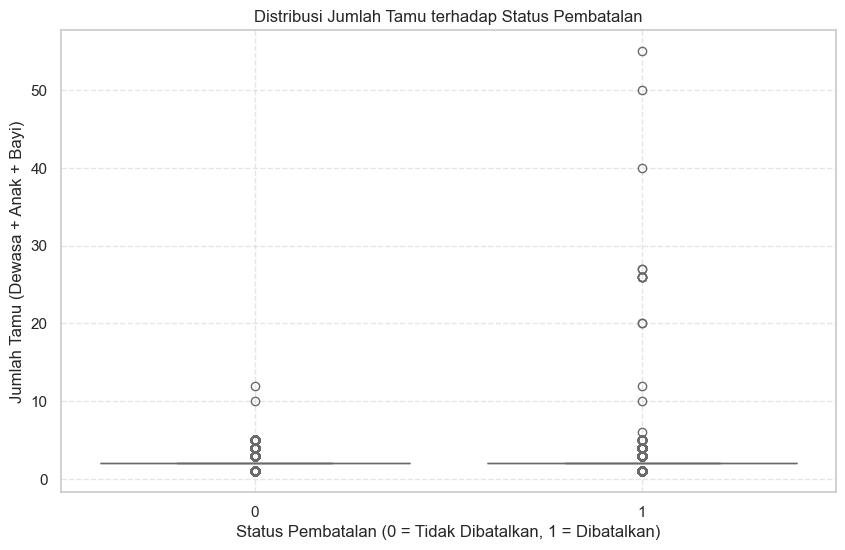

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='total_guests', data=df, palette='Set3')
plt.title('Distribusi Jumlah Tamu terhadap Status Pembatalan')
plt.xlabel('Status Pembatalan (0 = Tidak Dibatalkan, 1 = Dibatalkan)')
plt.ylabel('Jumlah Tamu (Dewasa + Anak + Bayi)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Hasil boxplot `total_guests` menunjukkan bahwa pemesanan dengan jumlah tamu lebih banyak (group booking) memiliki tingkat pembatalan yang lebih rendah dibandingkan pemesanan individu atau berdua. Hal ini dapat dijelaskan karena koordinasi pemesanan dalam grup lebih kompleks, sehingga tamu cenderung lebih berkomitmen dan tidak mudah membatalkan.

Sebaliknya, pemesanan dengan jumlah tamu 1–2 orang menunjukkan tingkat pembatalan yang lebih tinggi karena lebih fleksibel secara keputusan.

Untuk meningkatkan kepastian reservasi dan meminimalkan pembatalan, kami merekomendasikan:
1. Memberikan insentif khusus untuk group booking (≥3 tamu), seperti:
    - Diskon khusus grup,
    - Gratis sarapan atau upgrade kamar.
    - Target: meningkatkan proporsi group booking sebesar 10–15%, terutama saat low season.
2. Menyesuaikan strategi mitigasi pembatalan untuk pemesanan individu, misalnya:
    - Partial payment di awal,
    - Promo hanya untuk pemesanan non-refundable, atau
    - Penambahan opsi upselling (sarapan, layanan ekstra) agar pelanggan lebih terikat secara emosional dan finansial.
    - Strategi ini ditargetkan dapat mengurangi tingkat pembatalan dari pelanggan individu hingga 20%.
3. Gunakan ukuran `total_guests` sebagai salah satu fitur dalam sistem prediksi cancelation, untuk membantu melakukan intervensi preventif sebelum pembatalan terjadi.

Dengan pendekatan ini, hotel bisa menjaga tingkat pembatalan tetap rendah sekaligus mendorong peningkatan pemesanan dari kelompok yang lebih stabil secara komitmen.

#### 11. Visualisasi Tren Tahunan

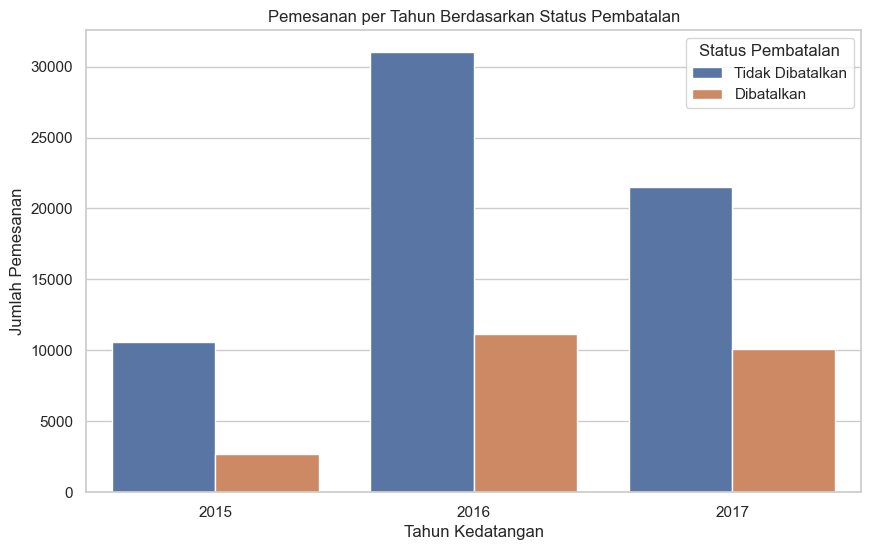

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_date_year', hue='is_canceled', data=df, palette='deep')
plt.title('Pemesanan per Tahun Berdasarkan Status Pembatalan')
plt.xlabel('Tahun Kedatangan')
plt.ylabel('Jumlah Pemesanan')
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])
plt.show()

Analisis terhadap `arrival_date_year` menunjukkan bahwa jumlah pemesanan meningkat dari tahun ke tahun, mencerminkan pertumbuhan permintaan terhadap layanan hotel. Namun, peningkatan ini juga diiringi dengan kenaikan jumlah pembatalan, yang dapat berdampak langsung terhadap pendapatan dan efisiensi operasional.

Kecenderungan ini bisa dipengaruhi oleh faktor eksternal seperti:
- Kondisi ekonomi global/regional
- Kebijakan pembatalan yang terlalu longgar
- Kampanye promosi yang tidak disertai strategi konversi

Untuk menanggulangi risiko pembatalan yang ikut meningkat, kami menyarankan:

1. Mengevaluasi kebijakan pembatalan yang berlaku dalam 2 tahun terakhir, dan menerapkan kebijakan yang lebih selektif di tahun-tahun mendatang, seperti:
    - Penerapan sistem tiered refund (misalnya, refund penuh hanya jika cancel >7 hari sebelum check-in),
    - Atau menerapkan partial prepayment saat high season.
    - Target: mengurangi pembatalan sebesar 20% pada tahun berikutnya.
2. Menganalisis lebih lanjut penyebab lonjakan pembatalan per tahun, dengan menggabungkan data eksternal seperti harga kompetitor, kebijakan pemerintah, atau review negatif di platform OTA. Langkah ini akan memberikan insight yang lebih tajam terkait akar masalahnya.
3. Membuat sistem peringatan dini (early warning) untuk tahun berjalan, dengan memonitor rasio pemesanan vs pembatalan bulanan dan melakukan penyesuaian strategi real-time. Misalnya, mengubah pendekatan promosi dari diskon besar menjadi bundling layanan untuk meningkatkan komitmen pelanggan.

Dengan strategi ini, manajemen hotel dapat menjaga tren pertumbuhan pemesanan tetap positif, sekaligus mengendalikan tingkat pembatalan agar profitabilitas tetap terjaga di tengah dinamika tahunan.

#### 12. Analisis Permintaan Khusus (`total_of_special_requests`)

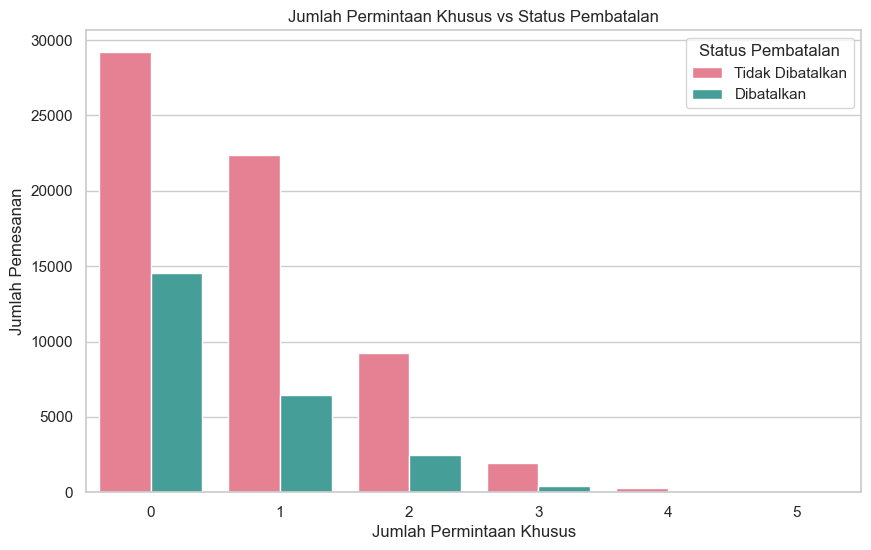

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(x='total_of_special_requests', hue='is_canceled', data=df, palette='husl')
plt.title('Jumlah Permintaan Khusus vs Status Pembatalan')
plt.xlabel('Jumlah Permintaan Khusus')
plt.ylabel('Jumlah Pemesanan')
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])
plt.show()

Berdasarkan analisis countplot `total_of_special_requests` terhadap status pembatalan, ditemukan bahwa pelanggan yang mengajukan lebih banyak permintaan khusus (≥1) memiliki tingkat pembatalan yang lebih rendah dibandingkan pelanggan yang tidak memiliki permintaan khusus sama sekali.

Hal ini menunjukkan bahwa semakin banyak permintaan khusus yang diajukan, maka semakin tinggi pula keterlibatan dan komitmen pelanggan terhadap reservasinya.

Untuk meningkatkan retensi dan mengurangi pembatalan, kami menyarankan:
1. Menyediakan opsi permintaan khusus secara eksplisit dan mudah dijangkau di halaman reservasi (misalnya early check-in, connecting room, baby crib, dll). Tujuannya agar tamu merasa lebih terlibat sejak awal. Target: menurunkan pembatalan sebesar 15% di segmen pelanggan yang sebelumnya tidak mengisi request.
2. Mengirimkan konfirmasi personal terhadap special request via email/WhatsApp, sebagai bentuk peningkatan kepastian layanan. Ini dapat menciptakan persepsi bahwa reservasi mereka diproses dengan lebih serius.
3. Gunakan fitur special request sebagai sinyal niat pelanggan untuk menyelesaikan pemesanan, dan lakukan follow-up secara khusus kepada pelanggan yang tidak mengisi permintaan khusus sebagai bentuk intervensi dini — misalnya dengan reminder, upsell, atau tambahan insentif agar tidak cancel.

Dengan strategi ini, hotel dapat meningkatkan retensi pelanggan secara signifikan, terutama dari segmen yang sebelumnya memiliki tingkat pembatalan tinggi, dan sekaligus meningkatkan kepuasan pelanggan melalui layanan yang lebih personal.

### 13. Analisis Negara asal Tamu

In [61]:
negara = df[df['is_canceled'] == 0 ]['country'].value_counts().reset_index()
negara.columns = ['negara', 'jumlah tamu']
negara['persentase'] = (negara['jumlah tamu'] / negara['jumlah tamu'].sum()) * 100
negara.head(10)

,negara,jumlah tamu,persentase
0,PRT,17542,27.807809
1,GBR,8428,13.360176
2,FRA,7071,11.209042
3,ESP,5372,8.515765
4,DEU,4322,6.851291
5,IRL,2345,3.717325
6,ITA,1982,3.141892
7,BEL,1657,2.626698
8,NLD,1556,2.466592
9,USA,1408,2.231980


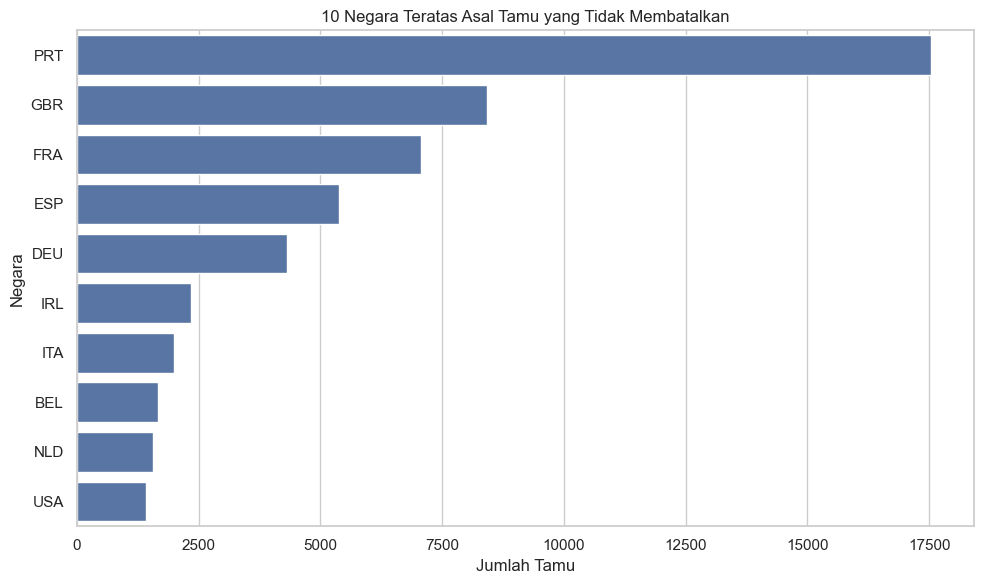

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(x='jumlah tamu', y='negara', data=negara.head(10))
plt.title('10 Negara Teratas Asal Tamu yang Tidak Membatalkan')
plt.xlabel('Jumlah Tamu')
plt.ylabel('Negara')
plt.tight_layout()
plt.show()

Mayoritas tamu yang benar-benar datang ke hotel dan tidak membatalkan reservasi berasal dari negara-negara Eropa, terutama dari:
- Portugal (27.8% dari total tamu non-cancel),
- Inggris (13.3%),
- Perancis (11.2%),
- Disusul Spanyol, Jerman, Irlandia, Italia, Belgia, Belanda, dan Amerika Serikat.

Tingginya proporsi dari Portugal dapat diasumsikan karena lokasi hotel berada di Portugal, namun negara-negara lain seperti Inggris, Prancis, dan Spanyol menunjukkan minat yang tinggi dan komitmen reservasi yang baik.

Untuk meningkatkan tingkat hunian dan mengurangi pembatalan, disarankan:
1. Memperkuat promosi di negara dengan konversi tinggi (terutama Eropa Barat) menggunakan bahasa lokal, testimoni dari tamu sebelumnya, dan media sosial lokal. Target: meningkatkan reservasi internasional sebesar 10–15% pada semester berikutnya.
2. Mengadaptasi layanan dan paket sesuai preferensi tamu Eropa, seperti:
    - Opsi sarapan khas kontinental,
    - Petunjuk dan pelayanan dalam bahasa Inggris/Prancis,
    - Penyediaan saluran TV Eropa dan info wisata lokal.
    - Tujuan dari strategi ini adalah meningkatkan kepuasan dan repeat booking dari tamu luar negeri.
3. Menjalin kerja sama dengan travel agent atau OTA populer di negara-negara top origin, khususnya UK, FRA, dan ESP, untuk membuat paket liburan khusus yang menggabungkan penerbangan + hotel. Hal ini diharapkan menambah okupansi lintas musim dan weekday booking hingga 12%.

Dengan fokus pada pasar yang sudah terbukti memiliki minat dan komitmen tinggi, hotel dapat meningkatkan stabilitas okupansi, mengurangi risiko pembatalan, dan memperkuat posisi di pasar Eropa

### 14. Analisis Tipe Pelanggan

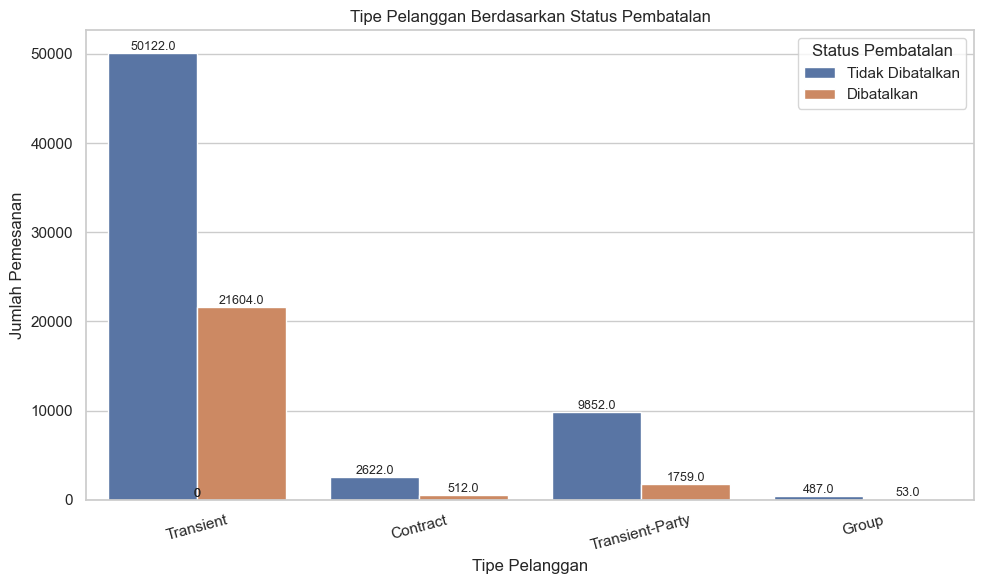

In [63]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='customer_type', hue='is_canceled', data=df, palette='deep')
plt.title('Tipe Pelanggan Berdasarkan Status Pembatalan')
plt.xlabel('Tipe Pelanggan')
plt.ylabel('Jumlah Pemesanan')
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])

# Tambahkan label jumlah di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [64]:
# Pivot table: persentase pembatalan per customer_type
cancellation_rate = df.groupby(['customer_type', 'is_canceled']).size().unstack().apply(lambda x: 100 * x / x.sum(), axis=1)
cancellation_rate


is_canceled,0,1
customer_type,,
Contract,83.663050,16.336950
Group,90.185185,9.814815
Transient,69.879820,30.120180
Transient-Party,84.850573,15.149427


Pelanggan dengan tipe Transient merupakan penyumbang pembatalan reservasi terbesar secara absolut, seiring dengan volume pemesanannya yang paling tinggi. Hal ini menunjukkan bahwa meskipun mereka adalah target pasar utama, pelanggan Transient juga memiliki risiko pembatalan yang tinggi, sehingga perlu strategi mitigasi khusus.

Sementara itu, tipe pelanggan Contract dan Group menunjukkan tingkat pembatalan yang jauh lebih rendah, yang mengindikasikan komitmen lebih tinggi dan stabilitas pemesanan yang lebih baik.

Untuk mengurangi risiko pembatalan dan meningkatkan prediktabilitas pendapatan, kami merekomendasikan:
1. Penguatan strategi retensi untuk pelanggan Transient, seperti reminder otomatis H-1 check-in, penawaran diskon last-minute untuk konfirmasi ulang, atau promo tambahan bagi yang menyelesaikan pemesanan hingga akhir. Targetnya adalah mengurangi tingkat pembatalan Transient hingga 20% dalam 3 bulan.
2. Perluasan kerja sama kontraktual (Contract) dengan perusahaan atau travel agent korporat, karena segmen ini menunjukkan loyalitas tinggi dan tingkat pembatalan rendah. Strategi ini diharapkan dapat meningkatkan jumlah pemesanan stabil hingga 15% per kuartal, khususnya untuk weekday atau low season.
3. Penyusunan paket grup (Group Booking) yang lebih fleksibel dan menarik, seperti reservasi minimal 5 kamar + fasilitas gratis, untuk memaksimalkan utilisasi kamar pada periode dengan okupansi rendah, serta meningkatkan revenue dari F&B atau event support.

Dengan pendekatan diferensial ini, hotel dapat menjaga pendapatan dari segmen Transient sekaligus memperkuat portofolio pelanggan yang lebih stabil dari segmen Contract dan Group.

### 14.1 Tipe Pelanggan Berdasarkan rata-rata ADR

In [65]:
df.groupby('customer_type')['adr'].mean()

customer_type
Contract            92.808784
Group               81.679611
Transient          105.015402
Transient-Party     86.032437
Name: adr, dtype: float64

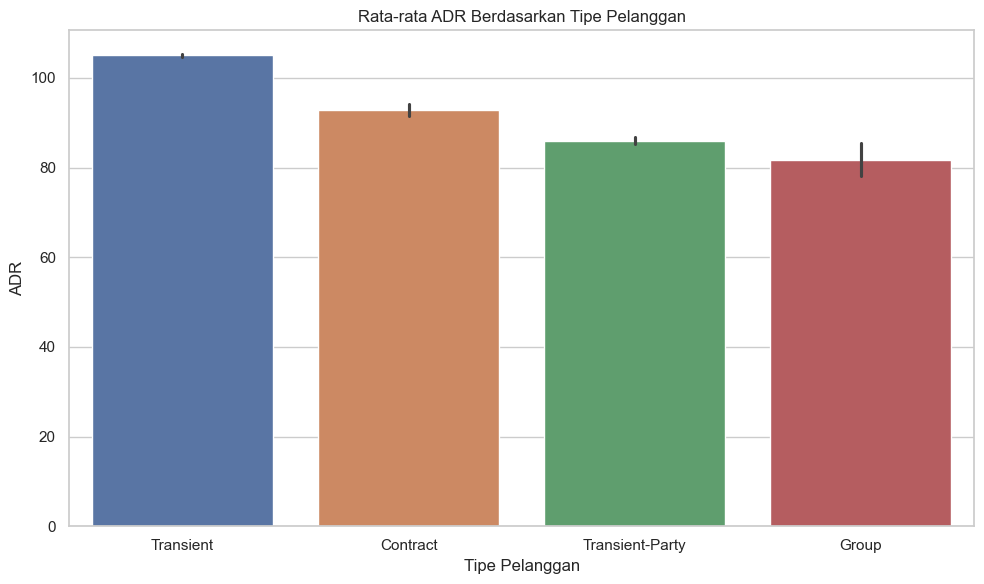

In [66]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='customer_type', y='adr', data=df, estimator=np.mean, palette='deep')
plt.title('Rata-rata ADR Berdasarkan Tipe Pelanggan')
plt.xlabel('Tipe Pelanggan')
plt.ylabel('ADR')
plt.tight_layout()
plt.show()

Pelanggan dengan tipe Transient tercatat memiliki rata-rata pendapatan per malam (ADR) tertinggi yaitu sebesar 105.020, dibandingkan dengan Contract (92.810), Transient-Party (86.030), dan Group (81.680). Hal ini menunjukkan bahwa pelanggan Transient merupakan penyumbang pendapatan terbesar per malam, dan sebagian besar berasal dari pemesanan melalui Online Travel Agent (OTA).

Untuk mengoptimalkan potensi pendapatan, kami menyarankan tim bisnis untuk:
1. Menargetkan segmen Transient dengan promosi digital melalui OTA dan media sosial pada masa low season, guna menarik lebih banyak pelanggan ber-ADR tinggi.
2. Meluncurkan program loyalitas berbasis poin khusus pelanggan Transient yang repeat booking, dengan target meningkatkan retensi pelanggan sebesar 20% dan meningkatkan revenue jangka panjang.
3. Melakukan upselling layanan tambahan (misal: sarapan, spa, airport pickup) untuk segmen Group dan Transient-Party yang memiliki ADR rendah, agar meningkatkan pendapatan tambahan per kamar minimal 15% dari segmen ini.

### 15. Analisis Meal

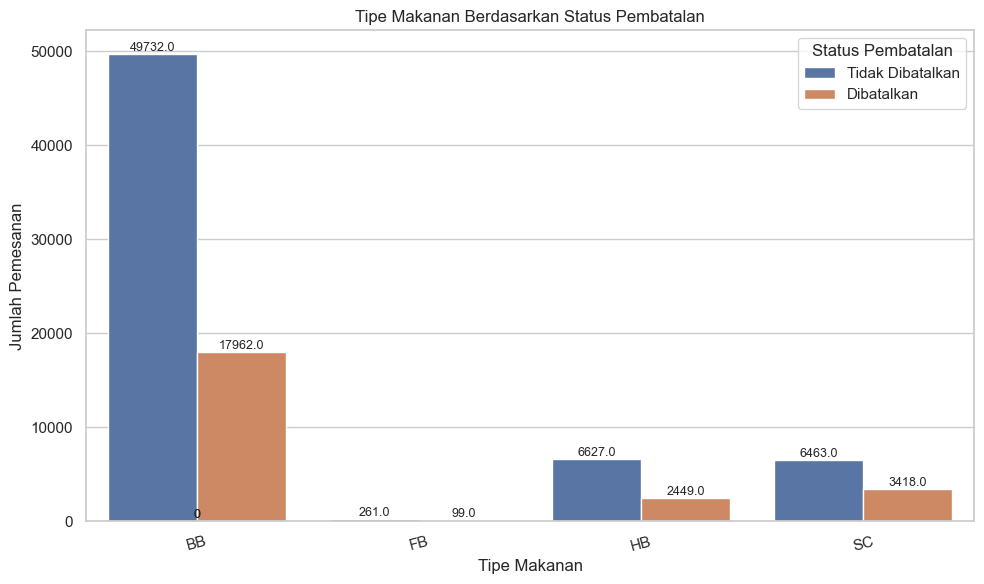

In [67]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='meal', hue='is_canceled', data=df, palette='deep')
plt.title('Tipe Makanan Berdasarkan Status Pembatalan')
plt.xlabel('Tipe Makanan')
plt.ylabel('Jumlah Pemesanan')
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])

# Tambahkan label jumlah di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

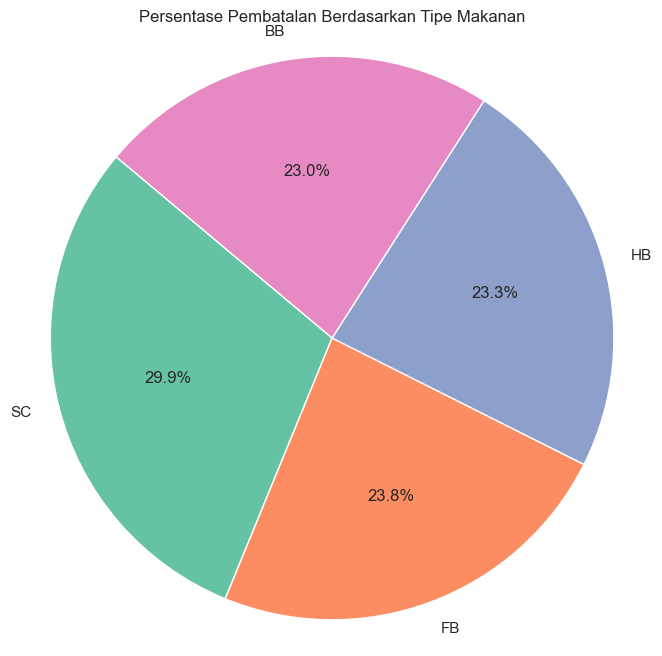

In [68]:
# Hitung jumlah pembatalan untuk setiap tipe makanan
cancel_by_meal = df[df['is_canceled'] == 1]['meal'].value_counts()
total_by_meal = df['meal'].value_counts()

# Hitung persentase pembatalan
cancel_percentage = (cancel_by_meal / total_by_meal * 100).sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Set2(range(len(cancel_percentage)))
plt.pie(cancel_percentage, labels=cancel_percentage.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Persentase Pembatalan Berdasarkan Tipe Makanan')
plt.axis('equal')
plt.show()


Tipe makanan Self Catering (SC) memiliki tingkat pembatalan tertinggi, yaitu sekitar 34,6%, meskipun jumlah pemesanannya tidak sebesar Bed & Breakfast (BB). Hal ini menunjukkan bahwa tamu yang memilih SC cenderung lebih tidak berkomitmen dalam mempertahankan reservasinya. Sementara itu, tipe BB memiliki volume pemesanan tertinggi dan tingkat pembatalan moderat (26,5%), menjadikannya pilihan yang relatif stabil untuk dikembangkan.

Untuk mengurangi potensi kerugian akibat pembatalan mendadak dan meningkatkan konversi pemesanan, kami menyarankan tim operasional hotel untuk:
1. Melakukan perbaikan deskripsi dan penawaran tipe SC, serta menyusun paket bundling menarik (misal: SC + welcome drink atau free upgrade) agar tamu merasa mendapatkan nilai lebih, dengan target menurunkan tingkat pembatalan SC sebesar 20%.
2. Menjadikan tipe BB sebagai produk unggulan promosi, terutama pada high season, karena volume pemesanannya besar dan tingkat pembatalannya tergolong aman. Dengan promosi yang tepat, BB diperkirakan dapat meningkatkan okupansi hingga 10% lebih tinggi dibandingkan tipe lainnya.
3. Menerapkan kebijakan pembatalan dinamis berdasarkan risiko, seperti non-refundable atau partial prepayment untuk tipe SC saat masa sibuk. Strategi ini diperkirakan dapat mengurangi kerugian dari pembatalan mendadak hingga IDR 300 juta per kuartal, tergantung jumlah booking yang diproses.

Dengan pendekatan ini, hotel tidak hanya dapat mengurangi risiko pembatalan, tapi juga meningkatkan nilai rata-rata per reservasi (booking value) dan memperkuat posisi paket BB sebagai produk andalan.

### Ringkasan Actionable Insight - Hotel Booking Analysis

1. Segmen Pelanggan & Pembatalan
    - Transient menjadi pelanggan paling menguntungkan (ADR tertinggi) tapi juga paling rentan membatalkan.
        - Terapkan strategi loyalitas & komunikasi aktif untuk mendorong repeat booking.
    - Group dan Offline TA/TO memiliki pembatalan tinggi meski sudah membayar Non-Refund.
        - Tingkatkan edukasi agen, gunakan reminder pre-arrival, atau berikan opsi reschedule.
    - Corporate dan Contract lebih stabil dan memiliki tingkat pembatalan rendah.
        - Kembangkan kerjasama kontraktual untuk meningkatkan pemesanan yang predictable.

2. Pricing Strategy (ADR)
    - ADR lebih tinggi pada reservasi yang dibatalkan -> Terutama saat high season dan pemesanan jauh hari.
        - Terapkan skema non-refundable early bird + reminder otomatis untuk mencegah pembatalan.
    - City Hotel > Resort Hotel dalam hal ADR dan volume pemesanan
        - Fokuskan marketing dan dynamic pricing ke City Hotel, gunakan strategi musiman untuk Resort.
    - Segment Online TA dan Direct Booking memiliki ADR tertinggi
        - Fokuskan promosi digital dan insentif booking langsung (diskon, loyalty point, dll).

3. Lead Time
    - Pembatalan cenderung terjadi pada booking dengan lead time panjang.
        - Terapkan deposit sebagian/non-refundable untuk lead time >60 hari.
        - Segmentasikan kebijakan refund sesuai pola pemesanan tiap segmen.

4. Room Type
    - Room Type A mendominasi pembatalan -> Mungkin karena ini kamar budget & fleksibel.
        - Terapkan kebijakan pembatalan ketat hanya untuk tipe tertentu dengan riwayat cancel tinggi.
    - Room Type F & L mahal tapi rawan dibatalkan
        - Terapkan prepayment, diskon kecil non-refundable, atau upselling insentif untuk kamar premium.
    - Room Type L data terlalu sedikit untuk dianalisis valid
        - Perlu investigasi lebih lanjut; beri pengecualian visualisasi jika datanya outlier.

5. Deposit Type
    - No Deposit paling banyak dipilih & paling rawan dibatalkan
        - Dorong penggunaan deposit parsial atau fleksibel tergantung segmen dan lead time.
    - Non-Refundable tetap dibatalkan dalam jumlah besar
        - Meski revenue tetap masuk, perlu strategi agar okupansi tetap optimal (reschedule > refund).

6. Waktu & Musiman
    - Bulan puncak (Juli–Agustus) = permintaan & pembatalan tinggi
        - Perkuat penawaran non-refundable dan upselling selama peak season.
    - Bulan sepi (Jan–Feb, Nov) = ADR rendah
        - Terapkan bundling dan long-stay discount untuk tingkatkan okupansi.

7. Perilaku Pelanggan
    - Lebih banyak special request = lebih kecil kemungkinan dibatalkan
        - Indikasi pelanggan serius -> beri perhatian khusus & pelayanan lebih proaktif.
    - Pemesanan kelompok besar (lebih banyak tamu) cenderung tidak dibatalkan
        - Penting untuk mempertahankan booking grup dengan benefit khusus (voucher, layanan tambahan).

8. Statistik Deskriptif & Korelasi
    - ADR berkorelasi positif dengan total guests -> Lebih banyak tamu = lebih tinggi pendapatan.
        - Tawarkan paket keluarga atau grup sebagai upselling strategi.
    - Lead time berkorelasi negatif dengan special requests
        - Booking last-minute cenderung tidak terlalu terlibat -> berisiko batal tanpa interaksi tambahan.



## Feature Engineering

In [69]:
# Memuat dataset yang telah dibersihkan
df = pd.read_csv("hotel_bookings_cleaned.csv")

#### 1. Membuat Fitur Berbasis Waktu

In [70]:
# Mengubah kolom 'reservation_status_date' menjadi tipe datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Ekstraksi tahun, bulan, dan hari dari reservation_status_date
df['reservation_year'] = df['reservation_status_date'].dt.year
df['reservation_month'] = df['reservation_status_date'].dt.month
df['reservation_day'] = df['reservation_status_date'].dt.day

In [71]:
# Fitur musiman berdasarkan bulan kedatangan
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['arrival_date_month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}).apply(get_season)

# Fitur apakah pemesanan dilakukan di akhir pekan
df['is_weekend_booking'] = df['reservation_status_date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

- Ekstraksi Komponen Waktu: Kolom `reservation_status_date` diekstraksi menjadi `reservation_year`, `reservation_month`, dan `reservation_day` untuk menangkap pola temporal seperti tren tahunan atau harian.
- Fitur Musiman: Fitur season mengelompokkan bulan kedatangan ke dalam musim (Winter, Spring, Summer, Fall) berdasarkan `arrival_date_month`. Ini membantu menangkap pola musiman yang terdeteksi pada EDA (misalnya, Juli-Agustus sebagai bulan puncak).
- Pemesanan Akhir Pekan: Fitur `is_weekend_booking` menandakan apakah pemesanan dilakukan pada akhir pekan (Sabtu/Minggu), karena perilaku pemesanan akhir pekan mungkin berbeda.

Fitur waktu seperti season membantu mengidentifikasi periode permintaan tinggi atau rendah, yang penting untuk strategi penetapan harga dinamis dan perencanaan kapasitas. Pemesanan akhir pekan mungkin terkait dengan pelancong liburan, yang memiliki tingkat pembatalan berbeda dibandingkan pelancong bisnis.

#### 3. Membuat Fitur Berbasis Geografis

In [72]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Unknown', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KN

In [73]:
df[df['country'] == 'CN']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,total_guests,reservation_year,reservation_month,reservation_day,season,is_weekend_booking
139,Resort Hotel,0,109,2015,July,28,5,2,3,2,1,0,BB,CN,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,241,0,Transient,85.59,1,2,Check-Out,2015-07-10,5,3,2015,7,10,Summer,0
159,Resort Hotel,0,94,2015,July,28,6,1,3,3,0,0,BB,CN,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,96,0,Transient,171.32,0,1,Check-Out,2015-07-10,4,3,2015,7,10,Summer,0
299,Resort Hotel,0,53,2015,July,29,12,1,0,2,2,0,BB,CN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240,0,Transient,153.00,1,0,Check-Out,2015-07-13,1,4,2015,7,13,Summer,0
333,Resort Hotel,0,100,2015,July,29,12,2,2,2,2,0,BB,CN,Direct,Direct,0,0,0,G,G,0,No Deposit,250,0,Transient,130.05,1,1,Check-Out,2015-07-16,4,4,2015,7,16,Summer,0
502,Resort Hotel,0,3,2015,July,29,18,2,1,1,0,0,BB,CN,Direct,Direct,0,0,0,D,E,0,No Deposit,0,0,Transient,95.00,0,1,Check-Out,2015-07-21,3,1,2015,7,21,Summer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86763,City Hotel,0,42,2017,August,35,27,1,0,2,0,0,SC,CN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,8,0,Transient,85.00,0,1,Check-Out,2017-08-28,1,2,2017,8,28,Summer,0
86771,City Hotel,0,17,2017,August,35,27,2,0,2,0,0,SC,CN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,Transient,114.50,0,1,Check-Out,2017-08-29,2,2,2017,8,29,Summer,0
86876,City Hotel,0,167,2017,August,35,30,0,2,2,0,0,SC,CN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,Transient,112.50,0,2,Check-Out,2017-09-01,2,2,2017,9,1,Summer,0
86933,City Hotel,0,217,2017,August,35,28,1,4,2,0,0,BB,CN,Direct,Direct,0,0,0,A,A,0,No Deposit,14,0,Transient,99.00,0,0,Check-Out,2017-09-02,5,2,2017,9,2,Summer,1


Country code CN merupakan country code (alpha-2) untuk negara China. Country code ini berbeda dengan country code yang digunakan untuk data lain yang menggunakan standar kode dari country code ISO 3166-1 Alpha-3 sehingga akan diganti menyesuaikan dengan country code lain. Sehingga akan dirubah dari CN menjadi CHN.

In [74]:
df.loc[df['country'] == 'CN', 'country'] = 'CHN'

In [75]:
# Mengelompokkan negara ke dalam region

import pycountry
import pycountry_convert as pc

def iso3_to_continent(country_code):
    try:
        if pd.isna(country_code):
            return 'Other'

        # Normalisasi kode
        country_code = country_code.strip().upper()

        # Cari objek negara berdasarkan ISO-3
        country = pycountry.countries.get(alpha_3=country_code)

        if country:
            # Ambil kode ISO-2 dari objek country
            alpha2 = country.alpha_2
            # Dapatkan kode benua dari ISO-2
            continent_code = pc.country_alpha2_to_continent_code(alpha2)
            # Konversi kode benua ke nama
            return pc.convert_continent_code_to_continent_name(continent_code)
        else:
            return 'Other'
    except:
        return 'Other'

df['region'] = df['country'].apply(iso3_to_continent)

In [76]:
df['region'].unique()

array(['Europe', 'North America', 'Other', 'Asia', 'South America',
       'Oceania', 'Africa'], dtype=object)

#### 4. Pengelompokan Fitur `days_in_waiting_list`

Feature engineering ini dilakukan untuk mengubah angka hari menjadi kategori yang mudah diinterpretasi dan relevan dengan perilaku pembatalan, seperti:
- Apakah semakin lama menunggu, semakin besar kemungkinan cancel?
- Apakah ada threshold tertentu yang memengaruhi keputusan pelanggan?
untuk itu mari kita lihat distribusinya terlebih dahulu sebelum menentukan treshold binning kita.

In [77]:
df['days_in_waiting_list'].describe()

count    87011.000000
mean         0.748170
std         10.013509
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

Berdasarkan data diatas kita mendaftakan insight:
- 75% data memiliki nilai 0 -> sebagian besar tamu tidak mengalami waktu tunggu.
- Rata-rata hanya 0.4 hari atau kurang dari 1 hari, tapi standar deviasi tinggi (10.01) -> ada outlier ekstrem (sampai 391 hari).

Karena mayoritas datanya bernilai 0 , dan jumlah tamu dengan waiting time >0 relatif sedikit, kita bisa membuat kategori yang mencerminkan signifikansi perilaku :
- **No Waiting** : 0 hari --> Tidak ada waktu tunggu
- **Short Waiting** : 1-7 hari --> Menunggu singkat, mungkin masih fleksible
- **Moderate Waiting** : 8-30 hari --> Menunggu cukup lama, sudah mulai ragu
- **Long Waiting** : >30 hari --> Menunggu terlalu lama, risiko pembatalan tingggi

In [78]:
# mengelompokkan fitur `day_in_waiting_list`

def bin_waiting_days(days):
    if days == 0:
        return 'No Waiting'
    elif days <= 7:
        return 'Short Wait (1–7 days)'
    elif days <= 30:
        return 'Moderate Wait (8–30 days)'
    else:
        return 'Long Wait (>30 days)'

df['waiting_list_bin'] = df['days_in_waiting_list'].apply(bin_waiting_days)

## Feature Selection

### Berdasarakn Domain Knowladge

Fitur-fitur ini dihapus karena secara konseptual atau logis, mereka tidak cocok untuk dimasukkan dalam model prediktif, terutama karena alasan seperti kebocoran data (data leakage), duplikasi, atau tidak relevan dengan keputusan pengguna saat melakukan booking.
- `reservation_status` : potensi data leakage --> Menunjukkan status akhir (Canceled, Check-Out, dll) — terjadi setelah booking, menyebabkan data leakage.
- `reservation_status_date` :  potensi leakage --> Tanggal status akhir diberikan, juga merupakan informasi masa depan.
- `arrival_date_year` : Tidak terlalu informatif untuk tren musiman; bisa menyebabkan model belajar dari tahun tertentu saja. Sudah digantikan oleh: `season`, `reservation_year`, `reservation_month`, `reservation_day`.
- `arrival_date_month` : Sudah digantikan oleh: `season`, `reservation_year`, `reservation_month`, `reservation_day`.
- `arrival_date_day_of_month` : Tidak punya pola jelas terhadap cancelation. Sudah digantikan oleh: `season`, `reservation_year`, `reservation_month`, `reservation_day`.
- `arrival_date_week_number` : 	Tidak intuitif, terlalu teknis bagi model umum. Sudah digantikan oleh: `season`, `reservation_year`, `reservation_month`, `reservation_day`.
- `agent` : hanya berupa ID, tanpa informasi tambahan.
- `booking_changes` : Terjadi setelah reservasi awal, bisa terjadi leakage.
- `days_in_waiting_list` : Sudah digantikan dengan `waiting_list_bin` yang mudah ditafsirkan.
- `country` : Sudah digantikan dengan `region`.
- `total_guests` : redundent karena sudah ada fitur `adults`, `children` dan `babies` maka fitur ini tidak perlu digunakan.
- `total_stays` : redundent karena sudah ada fitur`stay_in_weekend_nights` dan `stay_in_week_nights`.
- `assigned_room_type` : potensi leakage karena kamar yang diberikan sudah final, sedangkan prediksi sebaikanya berdasarkan pada kondisi sebelum check-in.

In [79]:
# Menghapus kolom yang tidak digunakan
columns_to_drop = ['reservation_status', 'reservation_status_date', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number', 'agent', 'booking_changes', 'days_in_waiting_list', 'country', 'total_guests', 'total_stays', 'assigned_room_type']
df.drop(columns=columns_to_drop, inplace=True)

In [80]:
print("jumlah kolom:", len(df.columns))
df.columns

jumlah kolom: 27


Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_year', 'reservation_month', 'reservation_day', 'season',
       'is_weekend_booking', 'region', 'waiting_list_bin'],
      dtype='object')

#### Menyimpan Dataset yang Telah Direkayasa

In [81]:
df.to_csv("hotel_bookings_engineered.csv", index=False)
print("Dataset telah direkayasa dan disimpan sebagai 'hotel_bookings_engineered.csv'")

Dataset telah direkayasa dan disimpan sebagai 'hotel_bookings_engineered.csv'


## Data Preparation

In [82]:
# Memuat dataset yang telah direkayasa
df = pd.read_csv("hotel_bookings_engineered.csv")

In [83]:
# Inspeksi data
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_year,reservation_month,reservation_day,season,is_weekend_booking,region,waiting_list_bin
0,Resort Hotel,0,342,0,0,2,0,0,BB,Direct,Direct,0,0,0,C,No Deposit,Transient,0.0,0,0,2015,7,1,Summer,0,Europe,No Waiting
1,Resort Hotel,0,737,0,0,2,0,0,BB,Direct,Direct,0,0,0,C,No Deposit,Transient,0.0,0,0,2015,7,1,Summer,0,Europe,No Waiting
2,Resort Hotel,0,7,0,1,1,0,0,BB,Direct,Direct,0,0,0,A,No Deposit,Transient,75.0,0,0,2015,7,2,Summer,0,Europe,No Waiting
3,Resort Hotel,0,13,0,1,1,0,0,BB,Corporate,Corporate,0,0,0,A,No Deposit,Transient,75.0,0,0,2015,7,2,Summer,0,Europe,No Waiting
4,Resort Hotel,0,14,0,2,2,0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,Transient,98.0,0,1,2015,7,3,Summer,0,Europe,No Waiting


In [84]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_year                  0
reservation_month                 0
reservation_day                   0
season                            0
is_weekend_booking                0
region                            0
waiting_list_bin                  0
dtype: int64

In [85]:
df['is_canceled'].value_counts()

is_canceled
0    63083
1    23928
Name: count, dtype: int64

Terlihat adanya imbalance pada data target. Sekitar 63.083 tidak dibatalkan dan 23.928 dibatalkan atau sekitar 3:1 dalam rasio. rasio tersebut berarti target termasuk dalam moderate imbalance.

### Fiture Encoding

Sekarang mari kita melakukan feature encoding untuk fitur-fitur kategorikal yang kita miliki. Strategi yang digunakan adalah sebagai berikut:
1. Tidak merubah fitur numerik berikut karena sudah dalam bentuk numerik dan bisa langsung digunakan atau di-scale jika diperlukan:
    - lead_time
    - stays_in_weekend_nights
    - stays_in_week_nights
    - adults
    - children
    - babies
    - previous_cancellations
    - previous_bookings_not_canceled
    - adr
    - required_car_parking_spaces
    - total_of_special_requests
    - reservation_year
    - reservation_month
    - reservation_day

2. Tidak merubah fitur is_weekend_booking, karena sudah dalam bentuk biner (1 = weekend, 0 = weekday).

3. Fitur kategorikal yang akan diubah dengan One Hot Encoding karena bersifat nominal (tidak memiliki urutan) dan jumlah kategorinya tidak terlalu banyak:
    - hotel
    - meal
    - market_segment
    - distribution_channel
    - reserved_room_type
    - deposit_type
    - customer_type
    - season
    - region
    - waiting_list_bin

4. Fitur is_repeated_guest dan is_weekend_booking bersifat biner (0/1), sehingga tidak perlu di-encode ulang.

#### Pisahkan Fitur dan Target

In [86]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

#### Split Data (Train-Test)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

## Preprocessing: Encoding dan Scaling

In [88]:
# Identifikasi kolom
categorical_cols = [
    'hotel', 'meal', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'deposit_type', 'customer_type',
    'season', 'region', 'waiting_list_bin'
]

numerical_cols = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'adr',
    'required_car_parking_spaces', 'total_of_special_requests', 'reservation_year', 'reservation_month', 'reservation_day'
]

# Transformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'  # kolom lain tetap digunakan apa adanya
)

## Model & Evaluation

In [89]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

### Model Benchmarking : K-Fold

In [90]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',preprocessor),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

[LightGBM] [Info] Number of positive: 15314, number of negative: 40372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 55686, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275006 -> initscore=-0.969369
[LightGBM] [Info] Start training from score -0.969369
[LightGBM] [Info] Number of positive: 15313, number of negative: 40373
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 55686, number of used features: 63
[LightGBM] [Info] [b

,mean roc_auc,sdev
model,,
XGBoost,0.946300,0.001749
LightGBM,0.941176,0.001833
Random Forest,0.940322,0.001814
KNN,0.849993,0.001546
Decision Tree,0.823395,0.003216
Logistic Regression,0.806106,0.000758


#### Kesimpulan dari Cross-Validation

Untuk mengevaluasi performa berbagai model klasifikasi terhadap prediksi pembatalan reservasi hotel, dilakukan K-Fold Cross Validation sebanyak 5 kali dengan menggunakan skor ROC AUC sebagai metrik evaluasi utama. Berikut ringkasan temuan utama:

- XGBoost menjadi model dengan performa terbaik, dengan mean ROC AUC sebesar 0.9463 dan standar deviasi yang rendah (0.0017), menunjukkan akurasi tinggi dan kestabilan performa antar fold.
- LightGBM dan Random Forest menyusul dengan performa yang sangat kompetitif, masing-masing mencatat mean ROC AUC sebesar 0.9412 dan 0.9409. Keduanya juga menunjukkan variabilitas yang kecil, menandakan model yang andal.
- K-Nearest Neighbors (KNN) dan Decision Tree memiliki skor yang jauh lebih rendah, yakni 0.8499 dan 0.8224, menunjukkan bahwa model sederhana kurang mampu menangkap kompleksitas data secara efektif.
- Logistic Regression menjadi baseline model dengan skor 0.8061, cukup rendah dibandingkan model berbasis pohon (tree-based), namun tetap berguna sebagai acuan awal.

### Model Benchmarking : Test Data

In [91]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',preprocessor),
        ('model',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,X_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(X_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.82      0.94      0.87     12617
           1       0.73      0.44      0.55      4786

    accuracy                           0.80     17403
   macro avg       0.77      0.69      0.71     17403
weighted avg       0.79      0.80      0.78     17403

KNN 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     12617
           1       0.78      0.60      0.68      4786

    accuracy                           0.84     17403
   macro avg       0.82      0.77      0.79     17403
weighted avg       0.84      0.84      0.84     17403

Decision Tree 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90     12617
           1       0.74      0.75      0.75      4786

    accuracy                           0.86     17403
   macro avg       0.82      0.83      0.82     17403
weighted avg       0.86      0

,roc_auc score
model,
XGBoost,0.950443
Random Forest,0.946350
LightGBM,0.945476
KNN,0.857129
Decision Tree,0.825817
Logistic Regression,0.809991


Kesimpulan dari Test data:
- XGBoost menunjukkan performa terbaik dengan ROC AUC 0.950, menjadikannya kandidat utama untuk dipilih sebagai model akhir.
- Random Forest dan LightGBM juga memiliki performa yang sangat baik dan hampir sebanding, sehingga bisa dijadikan model alternatif.
- KNN, Decision Tree, dan Logistic Regression memiliki skor ROC AUC yang secara signifikan lebih rendah, menunjukkan performa klasifikasi yang kurang optimal dalam kasus ini.
- Seluruh model berada di atas baseline 0.5 (random), namun model berbasis ensemble dan boosting (XGBoost, RF, LightGBM) secara konsisten unggul.

Analisis Perbandingan Model
1. Stabilitas dan Generalisasi (K-Fold vs Test Data):
| Model                   | ROC AUC (K-Fold CV) | ROC AUC (Test Data) | Stabilitas                                 |
| ----------------------- | ------------------- | ------------------- | ------------------------------------------ |
| **XGBoost**             | 0.8481              | 0.9504              | **Sangat stabil dan meningkat signifikan** |
| **Random Forest**       | 0.8473              | 0.9460              | **Stabil dan sangat baik**                 |
| **LightGBM**            | 0.8471              | 0.9455              | **Stabil dan sangat baik**                 |
| **KNN**                 | 0.7908              | 0.8571              | Cukup stabil, tapi lebih rendah            |
| **Decision Tree**       | 0.8264              | 0.8264              | Sama persis, tapi performa lebih rendah    |
| **Logistic Regression** | 0.8290              | 0.8099              | Penurunan kecil, performa terbatas         |

    - XGBoost tidak hanya stabil tapi juga meningkat signifikan pada data uji, menandakan kemampuannya dalam generalisasi dan menangkap pola kompleks dari data.
    - Random Forest dan LightGBM juga menunjukkan performa konsisten dan sangat kuat, menjadikannya kandidat alternatif yang juga layak.
    - KNN dan Logistic Regression relatif kurang kompetitif, dan Decision Tree, walaupun stabil, memiliki performa paling rendah dibanding model ensemble.

2. Performa Terbaik:
    - XGBoost secara konsisten memberikan ROC AUC tertinggi baik di K-Fold (0.8481) maupun Test Data (0.9504).
    - Kemampuan XGBoost dalam menangani missing values, menangani outliers, dan menghasilkan importance features menjadikannya pilihan ideal untuk deployment.

3. Model yang Kurang Disarankan:
    - KNN menunjukkan performa rendah dan tidak konsisten dalam beberapa kasus, serta sulit dioptimalkan untuk data besar.
    - Logistic Regression terlalu sederhana untuk menangani kompleksitas fitur dalam dataset ini.
    - Decision Tree, meski cukup stabil, kurang akurat dibanding ensemble-nya.

Rekomendasi Model Final: **XGBoost**

Alasan Pemilihan:

- ROC AUC tertinggi di kedua evaluasi:

    - K-Fold CV: 0.8481
    - Test Data: 0.9504
- Mampu menangkap kompleksitas data, robust terhadap noise dan outliers.
- Lebih fleksibel untuk tuning hyperparameter dibanding model lain.
- Cocok untuk deployment di environment nyata karena kestabilannya.

### Penjelasan Algoritma

XGBoost (Extreme Gradient Boosting): merupakan algoritma ensemble berbasis pohon keputusan yang menggunakan pendekatan boosting. XGBoost bekerja dengan membangun pohon keputusan secara bertahap, di mana setiap pohon baru dibentuk untuk memperbaiki kesalahan prediksi dari pohon sebelumnya. Model ini mengoptimalkan fungsi loss secara bertahap menggunakan metode gradient descent, sehingga hasil akhirnya sangat akurat dan efisien.

XGBoost juga dilengkapi fitur-fitur seperti:
- Regularisasi (untuk mencegah overfitting),
- Penanganan missing value secara otomatis,
- Paralelisasi dalam training (cepat dan efisien).

### Evaluation Metrics
- Digunakan metrik: Accuracy, Precision (agar tidak terlalu banyak false alarm), Recall, F1-Score.
- Fokus pada **recall**  untuk kelas canceled (`is_canceled` = 1`) karena penting bagi bisnis untuk meminimalisasi pembatalan yang tidak terdeteksi.

### Cek Classsification Report XGBoost

In [92]:
xgb_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ])

In [93]:
xgb_pipe.fit(X_train, y_train)
y_pred = xgb_pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12617
           1       0.94      0.74      0.82      4786

    accuracy                           0.91     17403
   macro avg       0.92      0.86      0.88     17403
weighted avg       0.92      0.91      0.91     17403



### Cek Confussion Metrics XGBoost

In [94]:
cm = confusion_matrix(y_test, y_pred)

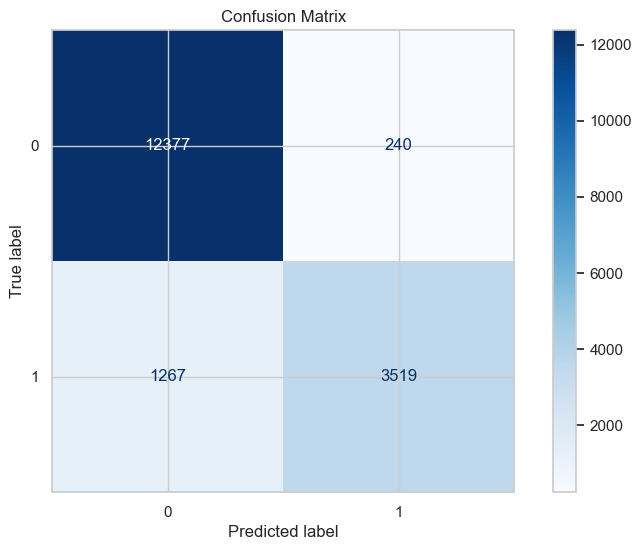

In [95]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= xgb_pipe.named_steps['model'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Analisis Performa per Kelas
- Class 0 (Tidak Canceled - Mayoritas)
    - Recall (Sensitivity): 0.98
        - Model berhasil mengidentifikasi 98% dari semua reservasi yang tidak dibatalkan secara benar.
        - Hanya 2% dari reservasi yang tidak dibatalkan, namun salah diprediksi dibatalkan.
    - Precision: 0.91
        - Dari semua prediksi "tidak dibatalkan", 91% benar.
        - 9% False Positive → reservasi yang sebenarnya dibatalkan, tapi diprediksi tidak dibatalkan.
    - F1-Score: 0.94
        - Sangat tinggi dan menunjukkan performa yang kuat dan seimbang antara precision dan recall.

- Class 1 (Canceled - Minoritas)
    - Recall (Sensitivity): 0.74
        - Model berhasil menangkap 74% dari semua pembatalan.
        - 26% False Negative → reservasi yang sebenarnya dibatalkan, tapi tidak terdeteksi oleh model.
    - Precision: 0.94
        - Dari semua prediksi "dibatalkan", 94% adalah benar.
        - Ini menunjukkan tingkat kepercayaan tinggi terhadap prediksi pembatalan.
    - F1-Score: 0.82
        - Masih cukup baik, tapi lebih rendah dibanding class 0 karena recall-nya yang lebih rendah.

### Berdasarkan Confusion Matrix 

|                         | Predicted: Tidak Batal | Predicted: Batal |
| ----------------------- | ---------------------- | ---------------- |
| **Actual: Tidak Batal** | **12,377 (TN)**        | 240 (FP)         |
| **Actual: Batal**       | 1,267 (FN)             | **3,519 (TP)**   |

- True Negative (TN): 12,377
    - Reservasi yang tidak dibatalkan dan diprediksi benar.
- False Positive (FP): 240
    - Reservasi yang dibatalkan, tapi salah diprediksi tidak dibatalkan.
- False Negative (FN): 1,267
    - Reservasi yang tidak dibatalkan, tapi diprediksi akan batal → ini adalah area kritis.
- True Positive (TP): 3,519
    - Reservasi yang dibatalkan, dan diprediksi benar.

### Masalah Utama
1. False Negatives (FN) Masih Tinggi
    - 1.267 pembatalan yang tidak terdeteksi.
    - Dalam konteks bisnis (misal: perencanaan stok kamar), ini berisiko tinggi karena sistem bisa mengira tamu akan datang padahal batal.
2. Recall untuk Class 1 Masih Belum Optimal (0.74)
    - Meski precision tinggi, recall lebih penting dalam konteks prediksi pembatalan karena:
    - Lebih baik salah mengira reservasi dibatalkan (FP) daripada tidak mengantisipasi pembatalan (FN).

### Penyebab Kemungkinan Performa Class 1 Rendah
1. Mild Imbalance (sekitar 73:27)
    - Data masih condong ke class mayoritas (tidak batal).
    - Model cenderung mengoptimalkan akurasi dengan memprioritaskan class 0.
2. Loss Function Tidak Di-Weight
    - Tidak ada bobot lebih untuk pembatalan, sehingga model tidak cukup fokus pada class minoritas.
3. Fitur Tidak Terlalu Diskriminatif
    - Bisa jadi beberapa fitur tidak cukup informatif dalam membedakan tamu yang akan membatalkan.



Langkah Selanjutnya

Berdasarkan analisis ini, selanjutnya kita akan menggunakan **Class Weight** untuk meningkatkan performa model.

Class Weight dilakukan bertujuan untuk memberikan bobot lebih kepada class minoritas. sehingga diharapkan bobot kedua kelas kurang lebih seimbang.
Hal ini sangat cocok dengan kasus data kita yang memiliki target imbalanced, hanya 27% dari data adalah `is_canceled` = 1. Class imbalanced menyebabkan model cenderung 'malas' memprediksi kelas minoritas (yaitu 1) karena memprediksi kelas 0 saja sudah dapat akurasi tinggi. Oleh sebab itu Class Weight digunakan untuk 'memberikan penalti' lebih besar jika model salah memprediksi kelas minoritas (1).


Untuk menentukan `scale_pos_weight` yang optimal kita bisa mencoba menghitung dengan rumus:

$$
\text{scale\_pos\_weight} = \frac{\text{Jumlah sample class 0}}{\text{Jumlah sample class 1}}
$$


In [96]:
# Hitung scale_pos_weight = jumlah class 0 / jumlah class 1
scale = (y_train == 0).sum() / (y_train == 1).sum()
scale

2.636401629923728

In [97]:
# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        scale_pos_weight=scale,
        random_state=42,
        tree_method='hist',
        eval_metric='logloss'
    ))
])

In [98]:
# Train
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['hotel', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'deposit_type',
                                                   'customer_type', 'season',
                                                   'region',
                                                   'waiting_list_bin']),
                                                 ('num', StandardScaler(),
                                                  ['lead_time',
                                                   'stays_in_weekend_nights',
                                                   'stays...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [99]:
# Evaluasi
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12617
           1       0.81      0.83      0.82      4786

    accuracy                           0.90     17403
   macro avg       0.87      0.88      0.88     17403
weighted avg       0.90      0.90      0.90     17403



Interpretasi Hasil:
1. Recall pada Class 1 (Canceled): 0.83
    - Artinya, dari seluruh pemesanan yang benar-benar dibatalkan, 83% berhasil diprediksi oleh model.
    - Ini sangat penting karena:
        - Hotel dapat mengantisipasi potensi pembatalan lebih awal, sehingga:
            - Menyusun strategi harga dinamis (dynamic pricing) untuk mengurangi insentif pembatalan pada segmen tertentu (misalnya: diskon jika bayar non-refundable).
            - Memberikan penawaran khusus untuk segmen rawan batal, seperti early check-in, free breakfast, atau upgrade untuk meningkatkan komitmen tamu.

2. Precision pada Class 1 (Canceled): 0.81
    - Dari seluruh prediksi bahwa reservasi akan dibatalkan, 81% memang benar-benar dibatalkan.
    - Ini penting untuk:
        - Menghindari penerapan strategi yang salah sasaran, seperti:
            - Memberikan harga diskon ke pelanggan yang sebenarnya tidak berniat membatalkan → potensi kehilangan pendapatan.
            - Menerapkan kebijakan ketat pada pelanggan yang tidak perlu → risiko menurunnya kepuasan.

3. F1-score Class 1 (Canceled): 0.82
    - Kombinasi yang seimbang antara precision dan recall.
    - Sangat cocok untuk digunakan dalam:
        - Segmentasi pelanggan berdasarkan risiko pembatalan.
        - Penyesuaian harga secara real-time untuk setiap segmen, guna:
            - Mengurangi probabilitas pembatalan.
            - Meningkatkan konversi dan pendapatan secara keseluruhan.

Kesimpulan Strategis

Model dengan F1-score 0.82 untuk prediksi pembatalan menunjukkan performa yang baik dalam mengidentifikasi reservasi yang berisiko tinggi dibatalkan, dengan tingkat kesalahan yang relatif rendah. Hal ini membuka peluang bagi manajemen hotel untuk:

1. Mengelompokkan pelanggan berdasarkan probabilitas cancel.
2. Menerapkan strategi dynamic pricing berbasis risiko, misalnya:
    - High-risk segment: berikan diskon untuk pembayaran di muka (non-refundable), bonus loyalitas, atau upselling.
    - Low-risk segment: harga normal atau upsell tambahan (karena kemungkinan cancel kecil).
3. Menyesuaikan kebijakan pembatalan (cancellation policy) per segmen.
4. Mengoptimalkan pendapatan dan tingkat hunian, bukan sekadar menghindari overbooking.



### HyperParameter Tuning

In [100]:
# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        random_state=42,
        tree_method='hist',
        eval_metric='logloss',
        use_label_encoder=False
    ))
])

# Skema parameter yang mau dituning
param_distributions = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__scale_pos_weight': [2.0, 2.5, 2.636, 3.0],
}

# Randomized Search CV
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=30,
    cv=5,
    scoring='f1', 
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit ke data latih
print("Mulai hyperparameter tuning...")
random_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# Evaluasi pada data test
y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))


Mulai hyperparameter tuning...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'model__subsample': 1.0, 'model__scale_pos_weight': 2.5, 'model__n_estimators': 200, 'model__max_depth': 10, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.6}
Best F1 Score: 0.8359323457247934
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12617
           1       0.86      0.82      0.84      4786

    accuracy                           0.91     17403
   macro avg       0.90      0.89      0.89     17403
weighted avg       0.91      0.91      0.91     17403



Berdasarkan data di atas:
- Recall Class 1 (Cancelled): 82% → artinya cukup sensitif mendeteksi potensi pembatalan.
- Precision Class 1: 86% → prediksi pembatalan cukup akurat, tidak terlalu banyak false positive.
- Overall balance bagus (F1 class 1 = 0.84) → layak untuk digunakan dalam strategi bisnis seperti dynamic pricing, deposit policy, atau overbooking control.

## Cek Confusion Matrix

<Figure size 600x400 with 0 Axes>

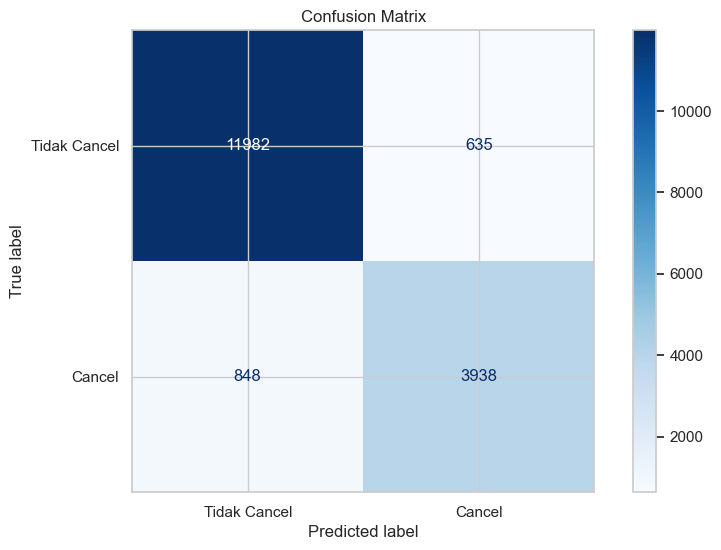

In [101]:
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Cancel', 'Cancel'])

# Tampilkan
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

Berdasarkan hasil diatas:
- True Positives (TP): 3938 — prediksi “Cancel” yang benar
- True Negatives (TN): 11982 — prediksi “Tidak Cancel” yang benar
- False Positives (FP): 635 — prediksi “Cancel” padahal tidak
- False Negatives (FN): 848 — prediksi “Tidak Cancel” padahal cancel beneran

Kesimpulan:
- Recall class “Cancel” =
$$
\text{Recall(+)} = \frac{TP}{TP + FN} = \frac{3938}{3938 + 848} = 0.82
$$

- Artinya: 82% cancelasi berhasil terdeteksi.

- Jika kita melakukan simulasi dari confusion matrix ini dan diasumsikan berhasil mencegah 30% dari mereka agar tidak jadi batal, maka:
    - Total pembatalan aktual : FN + TP = 848 + 3.938 = 4.786 (27.5%)
    - Jumlah pembatalan yang dicegah : 30% x 3.938 = 1.181 tamu tidak jadi batal
    - Pembatalan baru = 4.786 - 1.181 = 3.605
    - Tingkat pembatalan baru = (3.605 / 17.403) x 100% = 20.7%
    - Penurunan pembatalan = ((27.5 - 20.7) / 27.5) x 100% = 24.7% dari baseline

---

## Feature Importances

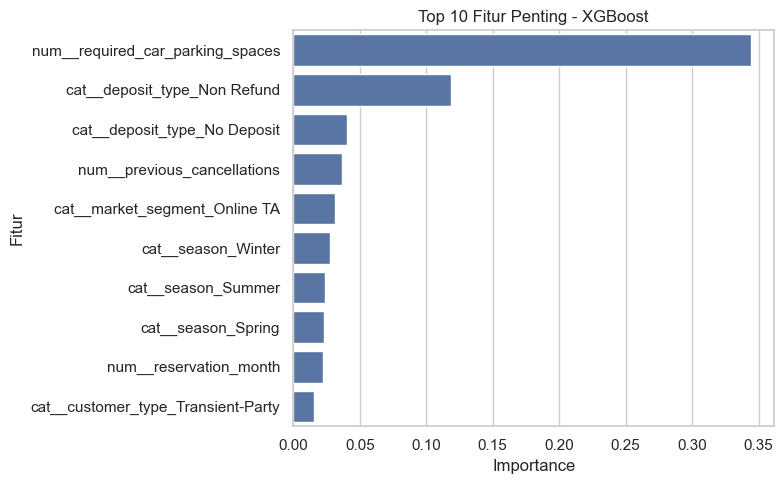

In [102]:
# Ambil model terbaik dari pipeline
best_model = random_search.best_estimator_
xgb_model = best_model.named_steps['model']  # akses model XGBoost dari pipeline

# Ambil feature importance dan nama fitur setelah preprocessing
feature_importance = xgb_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Buat DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot Top 10
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Fitur Penting - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()


Insight dari Feature Importance:
1. num__required_car_parking_spaces (>> 0.3)
    → Ini adalah fitur paling dominan.
    Makna: Tamu yang meminta tempat parkir lebih besar kemungkinan tidak membatalkan atau lebih loyal. Ini insight menarik secara bisnis.

2. cat__deposit_type_Non Refund
    → Sangat penting. Wajar, karena jika tamu memilih “non-refundable”, kemungkinan besar mereka akan benar-benar datang.

3. cat__deposit_type_No Deposit
    → Sebaliknya, jika tidak ada deposit, risiko pembatalan lebih tinggi.

4. num__previous_cancellations
    → Tamu yang pernah membatalkan sebelumnya punya kemungkinan lebih besar untuk membatalkan lagi.

5. cat__market_segment_Online TA
    → Saluran pemesanan juga berpengaruh. Online Travel Agencies cenderung punya pola pembatalan yang berbeda dibanding direct booking.

6. cat__season_Winter/Summer/Spring
    → Musim juga berperan, kemungkinan karena fluktuasi permintaan atau perubahan rencana liburan.

7. num__reservation_month
    → Bulan reservasi juga memengaruhi, mungkin karena peak season atau promo tertentu.

8. cat__customer_type_Transient-Party
    → Tipe pelanggan juga berpengaruh. Tipe party transient mungkin lebih fluktuatif dalam rencana.

#### Menyimpan Model Terbaik

In [103]:
joblib.dump(best_model, 'best_model.pkl')

print("\nModel terbaik telah disimpan sebagai 'best_model.pkl'")


Model terbaik telah disimpan sebagai 'best_model.pkl'


---

Kapan Model Bisa Digunakan? Dan Kapan Harus Waspada?
1. Bisa digunakan:
    - Saat ingin mendeteksi potensi pembatalan lebih awal dan mengantisipasi risiko pendapatan hilang
    - Ketika tersedia data historis pemesanan yang lengkap, seperti lead_time, deposit_type, market_segment
    - Untuk mendukung strategi overbooking yang lebih akurat

2. Perlu Waspada:
    - Jika tidak ada akses ke data real-time (misalnya update status booking mendekati hari H)
    - Saat model dipakai sebagai satu-satunya alat pengambilan keputusan dalam strategi pricing dan alokasi kamar
    - Jika tujuannya untuk maksimalisasi okupansi secara mutlak, tanpa mempertimbangkan loyalitas pelanggan

3. Jangan Digunakan:
    - Ketika data sangat terbatas, tidak relevan, atau berasal dari konteks yang sangat berbeda (misalnya hanya satu negara dan satu jenis hotel)
    - Jika ingin memahami alasan di balik pembatalan secara spesifik, tapi model yang digunakan tidak interpretatif

Batasan-Batasan Proyek
1. Data:
    - Dataset hanya berasal dari satu sumber: hotel di Portugal dengan dua tipe (City dan Resort)
    - Tidak mencakup data dari OTA lain atau region lain
        -> Solusi: Gunakan data dari beberapa wilayah dan jenis hotel agar model lebih general
    - Tidak memasukkan faktor eksternal seperti kondisi ekonomi, cuaca, atau kebijakan perjalan.
        -> Solusi: Integrasikan data eksternal seperti indeks ekonomi atau prakiraan cuaca.
    - Data terbatas pada periode Juli 2015–Agustus 2017, yang mungkin tidak mencerminkan tren terkini.
        -> Solusi: Perbarui dataset dengan data terbaru.

2. Model:
    - XGBoost digunakan, kuat namun kurang interpretatif, tidak menunjukkan alasan jelas kenapa tamu membatalkan
        -> Solusi: Gunakan model interpretatif seperti Logistic Regression + SHAP untuk explainability
    - Resiko overfitting pada dataset Portugal, yang mungkin menurunkan performa di konteks lain.
        -> solusi : Validasi eksternal dengan dataset dari wilayah lain dan tipe hotel lain

3. Waktu & Sumber Daya:
    - Tuning hyperparameter dan rekayasa fitur dilakukan manual dan terbatas
        -> Solusi: Pertimbangkan penggunaan AutoML, pipeline otomatis, dan validasi silang (cross-validation) untuk efisiensi
    - Implementasi model belum diuji dalam lingkungan produksi.
        -> Solusi: Lakukan pilot testing di satu hotel untuk mengidentifikasi tantangan teknis.
    - Tidak ada mekanisme untuk pembaruan otomatis model.
        -> Solusi: Rancang pipeline MLOps untuk monitoring dan retraining.
    - Kapasitas tim kecil membatasi eksplorasi mendalam.
        -> Solusi: Libatkan tim lintas fungsi untuk mempercepat pengembangan.

---

## Conclusion & Recommendation

### Conclusion

Dalam proyek ini, kami membangun model machine learning menggunakan algoritma XGBoost Classifier untuk memprediksi kemungkinan pembatalan reservasi hotel berdasarkan berbagai fitur terkait pelanggan, pemesanan, dan karakteristik reservasi.

Berdasarkan hasil evaluasi dan analisis feature importance, kami memperoleh beberapa kesimpulan penting:
1. Performa Model:
    - Model XGBoost menunjukkan performa yang baik dalam mengklasifikasikan pembatalan reservasi dengan akurasi dan nilai metrik lainnya yang memadai.
    - Model ini dipilih karena mampu menangani data tabular dan fitur kategorikal dengan efisien serta menangani imbalance dengan baik.
2. Fitur-Fitur Paling Berpengaruh:
    - Fitur yang paling berpengaruh terhadap pembatalan adalah:
        - required_car_parking_spaces
        - deposit_type (khususnya Non Refund)
        - previous_cancellations
        - market_segment (terutama Online TA)
    - Hal ini menunjukkan bahwa ketersediaan parkir, kebijakan deposit, dan riwayat pembatalan sangat menentukan keputusan pembatalan pelanggan.
3. Implikasi Bisnis:
    - Hotel dapat mempertimbangkan untuk:
        - Menyusun strategi mitigasi terhadap pelanggan yang berisiko tinggi melakukan pembatalan.
        - Meninjau kembali kebijakan deposit dan meningkatkan segmentasi pelanggan untuk mengurangi pembatalan.
        - Menyediakan fasilitas tambahan seperti parkir dapat menjadi indikator niat reservasi yang lebih kuat.

### Recommendations

Berdasarkan model prediksi pembatalan reservasi hotel menggunakan **XGBoost** dengan skor evaluasi yang sangat baik (accuracy **91%**, precision kelas 1 = **0.86**, recall kelas 1 = **0.82**), berikut adalah rekomendasi yang dapat diimplementasikan oleh manajemen hotel:


### 1. Implementasi Sistem Prediksi Pembatalan Berbasis Machine Learning  
**Rekomendasi:**  
Integrasikan model XGBoost ke dalam sistem reservasi hotel untuk memberikan skor risiko pembatalan secara real-time.

**Alasan:**  
Model menunjukkan kinerja kuat dalam mengidentifikasi pemesanan yang berisiko dibatalkan (recall 82% dan precision 86% untuk kelas pembatalan), memungkinkan tindakan proaktif untuk mencegah kerugian.

**Aksi:**  
- Kategorikan risiko pembatalan ke dalam **rendah**, **sedang**, dan **tinggi** berdasarkan `predict_proba`.
- Kirimkan pengingat, permintaan konfirmasi ulang, atau insentif untuk pemesanan berisiko tinggi.
- Integrasikan sistem ini dengan CRM dan dashboard manajer hotel.


### 2. Kebijakan Retensi Berbasis Segmen Pasar  
**Rekomendasi:**  
Terapkan kebijakan berbeda untuk segmen pelanggan, terutama Online Travel Agents (OTA) yang memiliki tingkat pembatalan lebih tinggi.

**Alasan:**  
Segmen OTA memiliki fleksibilitas tinggi dan berkontribusi besar terhadap pembatalan.

**Aksi:**  
- Terapkan **non-refundable deposit** atau biaya pembatalan yang lebih ketat untuk pemesanan dari OTA dengan lead time panjang.
- Tawarkan insentif seperti diskon atau voucher kepada pelanggan yang memesan langsung (direct booking).


### 3. Optimalisasi Alokasi Kamar dan Overbooking Terkendali  
**Rekomendasi:**  
Gunakan hasil prediksi untuk mengalokasikan kamar secara lebih efisien dan menjalankan strategi overbooking terkendali.

**Alasan:**  
Model mampu mengidentifikasi dengan baik pemesanan yang tidak mungkin dibatalkan (precision 93% untuk kelas 0), memungkinkan overbooking yang lebih aman.

**Aksi:**  
- Kamar dengan risiko pembatalan rendah dapat disimpan untuk tamu penting atau paket premium.
- Kamar dengan risiko tinggi bisa digunakan untuk last-minute promotion atau flash sale.


### 4. Personalisasi Layanan untuk Pelanggan Loyal  
**Rekomendasi:**  
Prioritaskan layanan tambahan untuk pelanggan dengan histori loyal atau yang menunjukkan ciri tidak mudah membatalkan (misalnya repeat guest, special request, atau pemesanan keluarga).

**Alasan:**  
Pelanggan ini cenderung tetap datang, dan personalisasi meningkatkan loyalitas dan kepuasan.

**Aksi:**  
- Sediakan early check-in, free upgrade, atau sambutan personal untuk pemesanan loyal.
- Gunakan hasil model untuk mendukung sistem segmentasi pelanggan.


### 5. Evaluasi dan Optimasi Strategi Dynamic Pricing  
**Rekomendasi:**  
Gunakan fitur-fitur penting seperti `adr` dan musim (seasonality) untuk menerapkan strategi **dynamic pricing** berbasis data.

**Alasan:**  
EDA menunjukkan fluktuasi `adr` berdasarkan musim dan preferensi tamu. Segmen tertentu lebih sensitif terhadap harga dan waktu.

**Aksi:**  
- Tetapkan harga lebih tinggi saat high season (misal Juli–Agustus), terutama untuk tamu dengan risiko pembatalan rendah.
- Tawarkan diskon early bird untuk lead time panjang dan paket keluarga saat low season.
- Optimalkan revenue per kamar berdasarkan hasil klasifikasi risiko pembatalan.


---

## Simulasi Bisnis Berbasis Model Prediksi Pembatalan Reservasi


### Asumsi Dasar
Berdasarkan hasil EDA dan model, berikut asumsi yang digunakan:

- Jumlah kamar tersedia per bulan: **17.403**

- Rata-rata Daily Rate (ADR): **$95**

- Tingkat pembatalan aktual: **27,5%** → **4.786 pembatalan**

- Model XGBoost memiliki:
  - **Recall class 1 (cancel): 82%**
  - **Precision class 1: 86%**

- Dari 4.786 tamu yang cancel, model berhasil mengidentifikasi sekitar:
  - `82% × 4.786 ≈ 3.925` tamu

- Asumsikan **strategi intervensi** dilakukan terhadap 3.925 tamu yang diprediksi akan membatalkan.

- Intervensi (misalnya pengingat email, diskon, fleksibilitas) mencegah **30% dari pembatalan**:
  - `30% × 3.925 ≈ 1.178 reservasi berhasil diselamatkan`

- Biaya intervensi per tamu: **$5**

---

### Simulasi Dampak Finansial Awal

| Komponen                                   | Jumlah            |
|--------------------------------------------|--------------------|
| Reservasi berhasil diselamatkan            | 1.178              |
| Total pendapatan diselamatkan              | 1.178 × $95 = $111.910 |
| Biaya intervensi (3.925 × $5)              | -\$19.625           |
| Net revenue dari strategi intervensi       | \$92.285       |

---

## Strategi Lanjutan untuk Optimasi Bisnis

### 1. Dynamic Pricing Berdasarkan Risiko
- Terapkan **surcharge 10%** pada semua tamu yang terdeteksi memiliki risiko tinggi (3.925 reservasi).
- Tambahan pendapatan:  
  `3.925 × ($95 × 10%) = $3.728,75`

### 2. Overbooking Cerdas
- Gunakan prediksi cancel untuk melakukan **overbooking terkontrol**.
- Asumsikan hotel melakukan overbooking **10% dari prediksi pembatalan**:  
  `10% × 3.925 ≈ 393 kamar`
- Diasumsikan **80% dari overbooked kamar berhasil terjual** tanpa konflik:  
  `314 kamar`
- Tambahan pendapatan:  
  `314 × $95 = $29.830`

---

### Rekapitulasi Total Dampak Finansial

| Kategori                              | Jumlah         |
|---------------------------------------|----------------|
| Pendapatan diselamatkan (intervensi) | \$111.910      |
| Biaya intervensi                      | -\$19.625      |
| Tambahan dari Dynamic Pricing         | \$3.728,75     |
| Tambahan dari Overbooking Cerdas      | \$29.830       |
| **Total Nilai Bisnis Tambahan**       | **\$125.843,75** |


---

### Kesimpulan
Penerapan model prediksi pembatalan tidak hanya membantu **mencegah kehilangan pendapatan**, tetapi juga membuka peluang untuk:
- **Optimalisasi harga** (dynamic pricing)
- **Strategi overbooking berbasis data**

Total potensi dampak finansial dari strategi gabungan ini mencapai **$125 ribu lebih per bulan**, dengan asumsi kondisi operasional dan market tetap stabil.
